均方误差 (MSE): 0.003584
均方根误差 (RMSE): 0.059869
平均绝对误差 (MAE): 0.049761


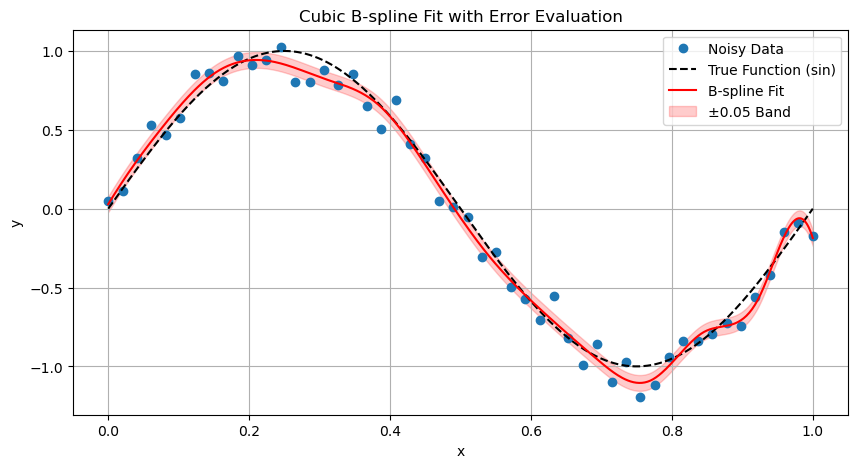

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_lsq_spline
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 设置参数
np.random.seed(42)
n = 50
x = np.linspace(0, 1, n)
y_true = np.sin(2 * np.pi * x)           # 原始函数（无噪声）
y_noisy = y_true + 0.1 * np.random.randn(n)  # 添加高斯噪声后的观测数据

# 设置B样条阶数
k = 3  # 三次样条

# 构造内部节点（n_internal_knots 个内部节点，不包含两端）
n_internal_knots = n // 4
internal_knots = np.linspace(0, 1, n_internal_knots + 2)[1:-1]

# 构造节点向量（端点重复 k+1 次）
knots = np.concatenate((
    np.repeat(0.0, k + 1),
    internal_knots,
    np.repeat(1.0, k + 1)
))

# 拟合 B 样条
spline = make_lsq_spline(x, y_noisy, knots, k)

# 更密的点用于画图和误差评估
x_dense = np.linspace(0, 1, 500)
y_dense_true = np.sin(2 * np.pi * x_dense)
y_dense_pred = spline(x_dense)

# 计算误差指标
mse = mean_squared_error(y_dense_true, y_dense_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_dense_true, y_dense_pred)

# 打印误差
print(f"均方误差 (MSE): {mse:.6f}")
print(f"均方根误差 (RMSE): {rmse:.6f}")
print(f"平均绝对误差 (MAE): {mae:.6f}")

# 绘图
plt.figure(figsize=(10, 5))
plt.plot(x, y_noisy, 'o', label='Noisy Data')
plt.plot(x_dense, y_dense_true, 'k--', label='True Function (sin)')
plt.plot(x_dense, y_dense_pred, 'r-', label='B-spline Fit')
plt.fill_between(x_dense, y_dense_pred - 0.05, y_dense_pred + 0.05, 
                 color='red', alpha=0.2, label='±0.05 Band')
plt.title('Cubic B-spline Fit with Error Evaluation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


📊 阶段 II 拟合误差:
MSE:  0.002375
RMSE: 0.048734
MAE:  0.039388


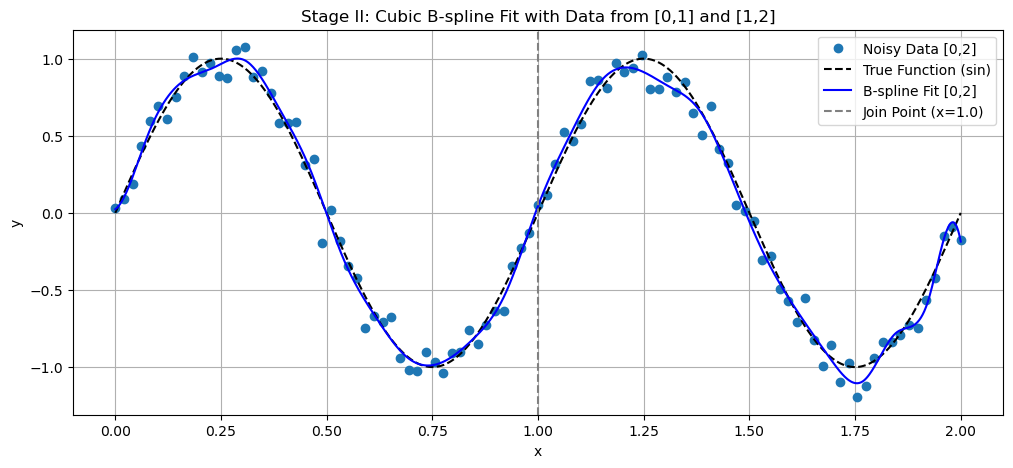


🔍 连接点 x = 1.0 处的导数连续性检查：
1阶导数：左 = 7.211509, 右 = 7.211418, 差值 = -9.077576e-05
2阶导数：左 = -45.386828, 右 = -45.387827, 差值 = -9.992183e-04


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_lsq_spline
from sklearn.metrics import mean_squared_error, mean_absolute_error

# --- 阶段 II 数据准备 ---
np.random.seed(42)
n = 50
k = 3
x2 = np.linspace(1, 2, n)
y2_true = np.sin(2 * np.pi * x2)
y2_noisy = y2_true + 0.1 * np.random.randn(n)

# 来自阶段 I 的数据（建议放在上一段定义）
x1 = np.linspace(0, 1, n)
y1_true = np.sin(2 * np.pi * x1)
y1_noisy = y1_true + 0.1 * np.random.randn(n)

# 合并数据
x_full = np.concatenate([x1, x2])
y_full = np.concatenate([y1_noisy, y2_noisy])
y_true_full = np.concatenate([y1_true, y2_true])

# 排序 + 去重（防止 make_lsq_spline 报错）
sort_idx = np.argsort(x_full)
x_full_sorted = x_full[sort_idx]
y_full_sorted = y_full[sort_idx]
_, unique_indices = np.unique(x_full_sorted, return_index=True)
x_final = x_full_sorted[unique_indices]
y_final = y_full_sorted[unique_indices]

# 构造结点
n_internal_knots = (2 * n) // 4
internal_knots = np.linspace(0, 2, n_internal_knots + 2)[1:-1]
knots = np.concatenate((
    np.repeat(0.0, k + 1),
    internal_knots,
    np.repeat(2.0, k + 1)
))

# 拟合
spline = make_lsq_spline(x_final, y_final, knots, k)

# 密集点用于评估和绘图
x_dense = np.linspace(0, 2, 1000)
y_dense_true = np.sin(2 * np.pi * x_dense)
y_dense_pred = spline(x_dense)

# 误差评估
mse = mean_squared_error(y_dense_true, y_dense_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_dense_true, y_dense_pred)

print(" 阶段 II 拟合误差:")
print(f"MSE:  {mse:.6f}")
print(f"RMSE: {rmse:.6f}")
print(f"MAE:  {mae:.6f}")

# 绘图
plt.figure(figsize=(12, 5))
plt.plot(x_final, y_final, 'o', label='Noisy Data [0,2]')
plt.plot(x_dense, y_dense_true, 'k--', label='True Function (sin)')
plt.plot(x_dense, y_dense_pred, 'b-', label='B-spline Fit [0,2]')
plt.axvline(1.0, color='gray', linestyle='--', label='Join Point (x=1.0)')
plt.title('Stage II: Cubic B-spline Fit with Data from [0,1] and [1,2]')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# 导数连续性验证
d1_left = spline.derivative(1)(1.0 - 1e-6)
d1_right = spline.derivative(1)(1.0 + 1e-6)
d2_left = spline.derivative(2)(1.0 - 1e-6)
d2_right = spline.derivative(2)(1.0 + 1e-6)

print("\n🔍 连接点 x = 1.0 处的导数连续性检查：")
print(f"1阶导数：左 = {d1_left:.6f}, 右 = {d1_right:.6f}, 差值 = {d1_right - d1_left:.6e}")
print(f"2阶导数：左 = {d2_left:.6f}, 右 = {d2_right:.6f}, 差值 = {d2_right - d2_left:.6e}")


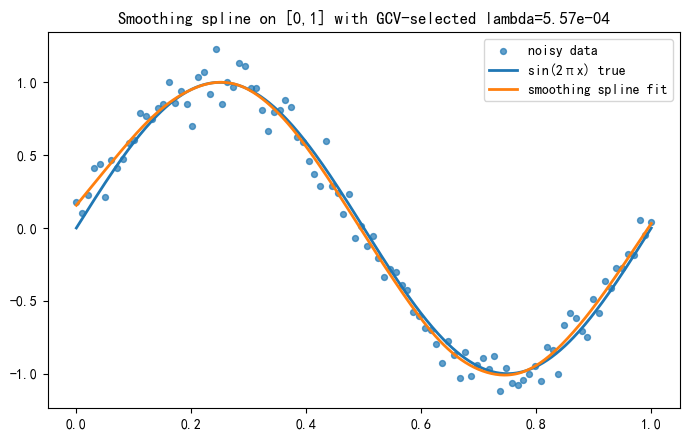

Best lambda (GCV): 5.569e-04
Effective DoF (tr(S)): 8.329
Training RMSE: 0.0915


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import BSpline
from numpy.linalg import solve
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei', 'Noto Sans CJK SC', 'Microsoft YaHei']  # 选一个存在的
matplotlib.rcParams['axes.unicode_minus'] = False  # 负号正常显示

# ---------- 1) 数据 ----------
np.random.seed(0)
n = 100
x = np.linspace(0.0, 1.0, n)
f_true = np.sin(2 * np.pi * x)       # 目标函数：sin(2πx)
sigma = 0.1
y = f_true + sigma * np.random.randn(n)

# ---------- 2) 三次B样条结点：端点重复k+1次，内部结点=全部观测点 ----------
k = 3  # cubic
knots = np.concatenate([
    np.repeat(x[0], k + 1),
    x[1:-1],
    np.repeat(x[-1], k + 1)
])
m = len(knots) - (k + 1)

# ---------- 3) 设计矩阵 B ----------
def bspline_design_matrix(x_eval, knots, k):
    m = len(knots) - (k + 1)
    B = np.zeros((len(x_eval), m))
    for j in range(m):
        c = np.zeros(m)
        c[j] = 1.0
        spline_j = BSpline(knots, c, k, extrapolate=False)
        B[:, j] = spline_j(x_eval)
    B[np.isnan(B)] = 0.0
    return B

B = bspline_design_matrix(x, knots, k)

# ---------- 4) 惩罚矩阵 Ω ----------
def bspline_second_deriv_penalty(knots, k, a=0.0, b=1.0, grid=2000):
    m = len(knots) - (k + 1)
    gx = np.linspace(a, b, grid)
    D2 = np.zeros((grid, m))
    for j in range(m):
        c = np.zeros(m)
        c[j] = 1.0
        spline_j = BSpline(knots, c, k, extrapolate=False)
        D2[:, j] = spline_j(gx, nu=2)
    D2[np.isnan(D2)] = 0.0
    w = np.ones(grid)
    w[0] *= 0.5
    w[-1] *= 0.5
    w /= (grid - 1)
    w *= (b - a)
    D2w = D2 * w[:, None]
    Omega = D2.T @ D2w
    return Omega

Omega = bspline_second_deriv_penalty(knots, k, a=0.0, b=1.0, grid=2000)

# ---------- 5) GCV 选择 λ ----------
BtB = B.T @ B
Bty = B.T @ y

def fit_with_lambda(lmbda):
    M = BtB + lmbda * Omega
    c = solve(M, Bty)
    yhat = B @ c
    A = solve(M, B.T)
    S = B @ A
    trS = np.trace(S)
    return c, yhat, trS

def gcv_score(lmbda):
    _, yhat, trS = fit_with_lambda(lmbda)
    rss = np.sum((y - yhat) ** 2)
    n_eff = max(1e-12, (n - trS))
    return rss / (n_eff ** 2)

lambdas = np.logspace(-8, 2, 60)
gcv_vals = np.array([gcv_score(lmbda) for lmbda in lambdas])
best_idx = int(np.argmin(gcv_vals))
lambda_star = float(lambdas[best_idx])

c_star, yhat_star, trS_star = fit_with_lambda(lambda_star)

# ---------- 6) 可视化 ----------
xx = np.linspace(0.0, 1.0, 400)
B_dense = bspline_design_matrix(xx, knots, k)
f_fit = B_dense @ c_star

plt.figure(figsize=(7,4.5))
plt.scatter(x, y, s=18, label='noisy data', alpha=0.7)
plt.plot(xx, np.sin(2 * np.pi * xx), label='sin(2πx) true', linewidth=2)
plt.plot(xx, f_fit, label='smoothing spline fit', linewidth=2)
plt.title(f"Smoothing spline on [0,1] with GCV-selected lambda={lambda_star:.2e}")
plt.legend()
plt.tight_layout()
plt.show()

# ---------- 7) 输出指标 ----------
edf = trS_star
print(f"Best lambda (GCV): {lambda_star:.3e}")
print(f"Effective DoF (tr(S)): {edf:.3f}")
print(f"Training RMSE: {np.sqrt(np.mean((y - yhat_star)**2)):.4f}")


[VCM] Best lambda (GCV): 3.769e-04
[VCM] Effective DoF tr(S): 41.32
[VCM] Training RMSE: 0.2646


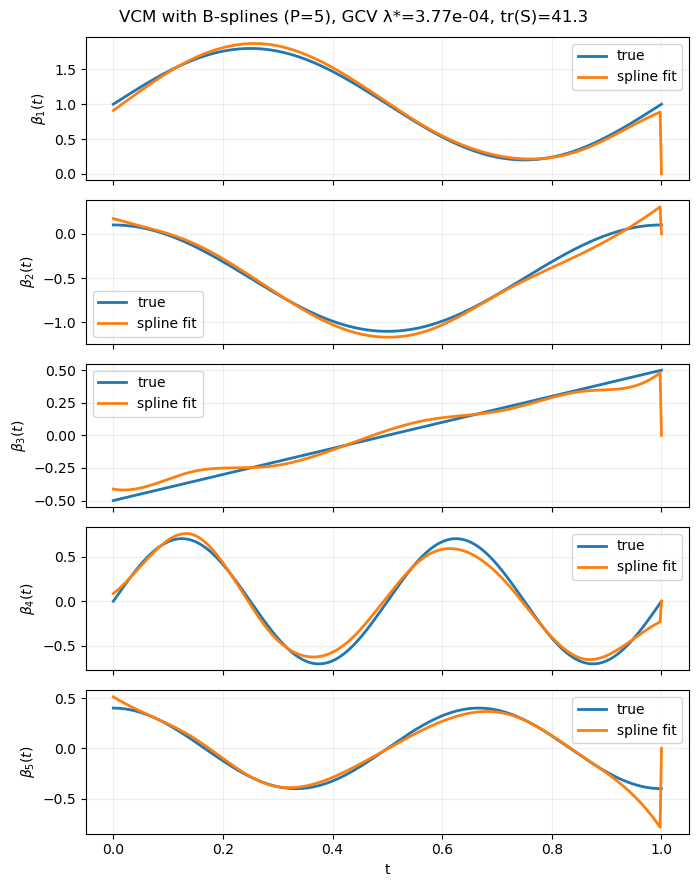

In [2]:
import numpy as np
from scipy.interpolate import BSpline
from scipy.linalg import cho_factor, cho_solve
import matplotlib.pyplot as plt

# ---------- 1) B样条设计矩阵 ----------
def bspline_design_matrix(x_eval, knots, k):
    """
    返回 B ∈ R^{n×m}, 其中 B[i, j] = N_{j,k}(x_i) .
    """
    m = len(knots) - (k + 1)
    B = np.zeros((len(x_eval), m))
    for j in range(m):
        c = np.zeros(m); c[j] = 1.0
        spline_j = BSpline(knots, c, k, extrapolate=False)
        B[:, j] = spline_j(x_eval)
    B[np.isnan(B)] = 0.0
    return B

# ---------- 2) 二阶导惩罚矩阵 Ω ≈ ∫ N''(x) N''(x) dx ----------
def bspline_second_deriv_penalty(knots, k, a=None, b=None, grid=2000):
    """
    返回 Ω ∈ R^{m×m}, 近似 Ω[j,l] = ∫ N''_{j,k}(x) N''_{l,k}(x) dx .
    """
    m = len(knots) - (k + 1)
    if a is None: a = knots[0]
    if b is None: b = knots[-1]
    gx = np.linspace(a, b, grid)
    D2 = np.zeros((grid, m))
    for j in range(m):
        c = np.zeros(m); c[j] = 1.0
        spline_j = BSpline(knots, c, k, extrapolate=False)
        D2[:, j] = spline_j(gx, nu=2)
    D2[np.isnan(D2)] = 0.0
    # 复合梯形权重
    w = np.ones(grid); w[0] *= 0.5; w[-1] *= 0.5
    w *= (b - a) / (grid - 1)
    Omega = D2.T @ (D2 * w[:, None])
    return Omega

# ---------- 3) 构造 VCM 的大设计矩阵 X̃ ----------
def build_vcm_design(B, X):
    """
    输入:
      B:  n×m  (样条基)
      X:  n×P  (P=5 个协变量)
    返回:
      X_tilde: n × (mP), 以 [diag(X[:,0]) B | ... | diag(X[:,P-1]) B] 拼接
    """
    n, m = B.shape
    P = X.shape[1]
    blocks = [(X[:, j][:, None] * B) for j in range(P)]
    X_tilde = np.hstack(blocks)  # n × (mP)
    return X_tilde

# ---------- 4) 构造块惩罚矩阵 P(λ) ----------
def build_penalty(Omega, lam, P):
    """
    Omega: m×m
    lam:   标量 (统一λ) 或 长度为 P 的向量 (逐系数λ)
    返回:  Pmat = blockdiag(λ_1 Ω, ..., λ_P Ω) ∈ R^{mP × mP}
    """
    m = Omega.shape[0]
    if np.isscalar(lam):
        lam_vec = np.full(P, float(lam))
    else:
        lam_vec = np.asarray(lam).reshape(-1)
        assert len(lam_vec) == P
    blocks = [lam_vec[j] * Omega for j in range(P)]
    return np.block([[blocks[i] if i==j else np.zeros_like(Omega) for j in range(P)] for i in range(P)])

# ---------- 5) 拟合（固定 λ） ----------
def vcm_fit_with_lambda(t, X, y, knots, k, Omega=None, lam=1.0, jitter=1e-8):
    """
    t:    n,  变系数的索引（例如时间或分位）
    X:    n×P, P=5
    y:    n
    knots,k: B样条配置
    lam:  标量或长度为P的向量
    返回: (c_hat, yhat, trS, B, X_tilde, Omega)
      其中 c_hat 为 (mP,) 向量，按 P 个块（每块 m 维）对应 β_p 的系数
    """
    B = bspline_design_matrix(t, knots, k)  # n×m
    if Omega is None:
        a, b = float(np.min(t)), float(np.max(t))
        Omega = bspline_second_deriv_penalty(knots, k, a=a, b=b, grid=2000)  # m×m

    X_tilde = build_vcm_design(B, X)  # n × (mP)
    XtX = X_tilde.T @ X_tilde         # (mP)×(mP)
    Xty = X_tilde.T @ y               # (mP,)
    Pmat = build_penalty(Omega, lam, X.shape[1])  # (mP)×(mP)

    # 数值稳定的小脊项（对半正定Ω很常见）
    ridge = jitter * np.trace(XtX) / XtX.shape[0]
    M = XtX + Pmat + ridge * np.eye(XtX.shape[0])

    # SPD 用 Cholesky 更稳
    cF = cho_factor(M, lower=True, check_finite=False)
    c_hat = cho_solve(cF, Xty, check_finite=False)          # (mP,)
    yhat = X_tilde @ c_hat                                   # n

    # 有效自由度 tr(S) = tr( (X^T X) M^{-1} )，避免构造 n×n 的 S
    # 先解 U = M^{-1} (X^T X)
    U = cho_solve(cF, XtX, check_finite=False)
    trS = float(np.trace(U))

    return c_hat, yhat, trS, B, X_tilde, Omega

# ---------- 6) GCV 选择 λ（统一λ版本） ----------
def vcm_gcv(t, X, y, knots, k, lambdas=np.logspace(-8, 2, 60)):
    gcv_vals = []
    cache = {}
    for lam in lambdas:
        c_hat, yhat, trS, B, X_tilde, Omega = vcm_fit_with_lambda(
            t, X, y, knots, k, Omega=None, lam=lam
        )
        rss = np.sum((y - yhat)**2)
        n = len(y)
        denom = max(1e-12, (n - trS))
        gcv = rss / (denom**2)
        gcv_vals.append(gcv)
        cache[lam] = (c_hat, yhat, trS, B, X_tilde, Omega, rss)
    gcv_vals = np.asarray(gcv_vals)
    best_idx = int(np.argmin(gcv_vals))
    lam_star = float(lambdas[best_idx])
    c_hat, yhat, trS, B, X_tilde, Omega, rss = cache[lam_star]
    rmse = float(np.sqrt(np.mean((y - yhat)**2)))
    return lam_star, (c_hat, yhat, trS, B, X_tilde, Omega, rmse, gcv_vals, lambdas)

# ---------- 7) 将系数向量拆成各 β_p 的系数块 ----------
def split_coef_blocks(c_hat, m, P):
    """
    输入 (mP,) → 输出 list 长度 P，每个元素为 (m,)
    """
    return [c_hat[j*m:(j+1)*m] for j in range(P)]

# ---------- 8) 在致密网格上评估每个 β_p(t) ----------
def eval_beta_on_grid(xx, knots, k, coef_blocks):
    """
    coef_blocks: list of length P，每个 (m,) 为β_p的B样条系数
    返回: betas ∈ R^{len(xx) × P}
    """
    B_dense = bspline_design_matrix(xx, knots, k)  # len(xx) × m
    P = len(coef_blocks)
    betas = np.column_stack([B_dense @ coef_blocks[p] for p in range(P)])
    return betas

# ---------- 9) 示例：P=5 的模拟数据 ----------
if __name__ == "__main__":
    np.random.seed(42)

    # 数据规模
    n = 400
    P = 5
    t = np.sort(np.random.rand(n))         # 变系数索引 t ∈ [0,1]
    X = np.random.randn(n, P)              # 5 个协变量
    # 真实 β_p(t)
    def b1(u): return 1.0 + 0.8*np.sin(2*np.pi*u)
    def b2(u): return -0.5 + 0.6*np.cos(2*np.pi*u)
    def b3(u): return (u - 0.5)
    def b4(u): return 0.7*np.sin(4*np.pi*u)
    def b5(u): return 0.4*np.cos(3*np.pi*u)
    beta_true = np.column_stack([b1(t), b2(t), b3(t), b4(t), b5(t)])  # n×5

    # 生成响应 y
    signal = np.sum(X * beta_true, axis=1)
    y = signal + 0.3*np.random.randn(n)

    # B样条配置（统一结点）
    k = 3  # 三次B样条
    # 均匀内部结点：例如 8 个内部结点（可按需调整）
    n_inner = 8
    inner = np.linspace(0, 1, n_inner)
    # 端点重复 k+1 次（开放均匀结点）
    knots = np.r_[np.repeat(0.0, k+1), inner, np.repeat(1.0, k+1)]
    m = len(knots) - (k + 1)

    # 用 GCV 选统一 λ
    lam_star, pack = vcm_gcv(t, X, y, knots, k, lambdas=np.logspace(-8, 2, 60))
    c_hat, yhat, trS, B, X_tilde, Omega, rmse, gcv_vals, lambdas = pack
    coef_blocks = split_coef_blocks(c_hat, m, P)

    print(f"[VCM] Best lambda (GCV): {lam_star:.3e}")
    print(f"[VCM] Effective DoF tr(S): {trS:.2f}")
    print(f"[VCM] Training RMSE: {rmse:.4f}")

    # 可视化：各 β_p(t) 的真值 vs 估计
    xx = np.linspace(0, 1, 400)
    betas_hat = eval_beta_on_grid(xx, knots, k, coef_blocks)

    fig, axes = plt.subplots(P, 1, figsize=(7, 9), sharex=True)
    titles = [r"$\beta_1(t)$", r"$\beta_2(t)$", r"$\beta_3(t)$", r"$\beta_4(t)$", r"$\beta_5(t)$"]
    true_funcs = [b1, b2, b3, b4, b5]
    for p in range(P):
        axes[p].plot(xx, true_funcs[p](xx), lw=2, label="true")
        axes[p].plot(xx, betas_hat[:, p], lw=2, label="spline fit")
        axes[p].set_ylabel(titles[p])
        axes[p].grid(alpha=0.2)
        axes[p].legend(loc="best")
    axes[-1].set_xlabel("t")
    fig.suptitle(f"VCM with B-splines (P=5), GCV λ*={lam_star:.2e}, tr(S)={trS:.1f}")
    plt.tight_layout()
    plt.show()


[VCM] lambda* (GCV) = 1.000e-08
[VCM] tr(S) = 400.00
[VCM] Train RMSE = 0.0000

Group |  L2(β̂)      Curv(β̂)     ||ĉ||2     tag
    1 | 1.1891e+00 2.4599e+02 3.6648e+00  [signal]
    2 | 5.1526e-01 1.2786e+02 2.2551e+00  [signal]
    3 | 6.3322e-02 6.8941e+00 1.0880e+00  [signal]
    4 | 6.7119e-02 3.5036e+02 1.2632e+00  [signal]
    5 | 3.4383e-02 1.2211e+02 8.8147e-01  [signal]
    6 | 9.1644e-03 1.5611e+01 3.2282e-01  [distr]
    7 | 6.5036e-03 4.1818e+00 3.1534e-01  [distr]
    8 | 1.2347e-02 5.2959e+00 3.9522e-01  [distr]
    9 | 5.7955e-03 1.3172e+01 2.8615e-01  [distr]
   10 | 2.9988e-02 2.3448e+01 6.9292e-01  [distr]
   11 | 1.5952e-03 7.4847e+00 1.9029e-01  [distr]
   12 | 2.8280e-02 7.1225e+01 7.7273e-01  [distr]
   13 | 3.5478e-03 6.9909e+00 2.3685e-01  [distr]
   14 | 1.8296e-03 1.0531e+01 1.7069e-01  [distr]
   15 | 1.3335e-02 7.8255e+00 4.3008e-01  [distr]
   16 | 7.8532e-03 2.1039e+01 3.0424e-01  [distr]
   17 | 6.6108e-03 1.6039e+01 3.2668e-01  [distr]
   18 | 2.4095e

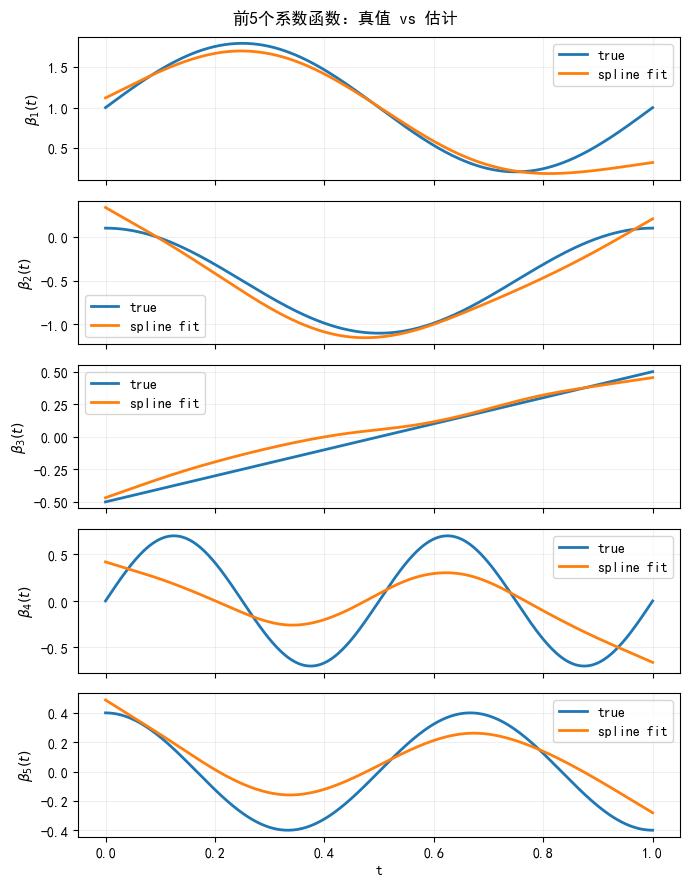

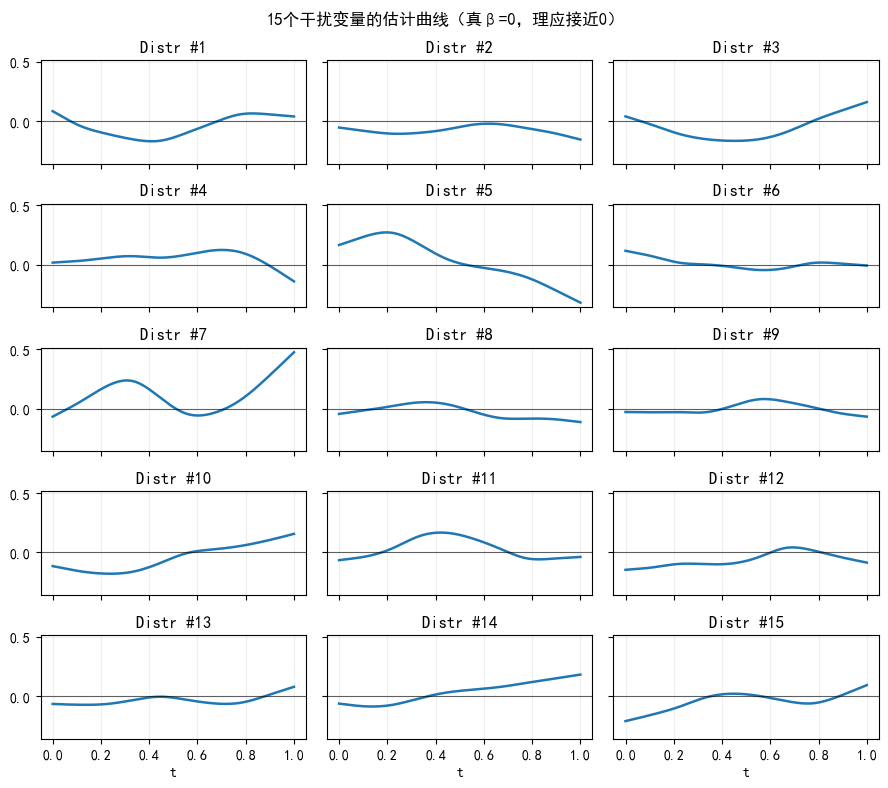

In [8]:
import numpy as np
from scipy.interpolate import BSpline
from scipy.linalg import cho_factor, cho_solve
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei', 'Noto Sans CJK SC', 'Microsoft YaHei']  # 选一个存在的
matplotlib.rcParams['axes.unicode_minus'] = False  # 负号正常显示

# ---------- B样条与惩罚 ----------
def bspline_design_matrix(x_eval, knots, k):
    m = len(knots) - (k + 1)
    B = np.zeros((len(x_eval), m))
    for j in range(m):
        c = np.zeros(m); c[j] = 1.0
        spline_j = BSpline(knots, c, k, extrapolate=False)
        B[:, j] = spline_j(x_eval)
    B[np.isnan(B)] = 0.0
    return B

def bspline_second_deriv_penalty(knots, k, a=None, b=None, grid=2000):
    m = len(knots) - (k + 1)
    if a is None: a = knots[0]
    if b is None: b = knots[-1]
    gx = np.linspace(a, b, grid)
    D2 = np.zeros((grid, m))
    for j in range(m):
        c = np.zeros(m); c[j] = 1.0
        spline_j = BSpline(knots, c, k, extrapolate=False)
        D2[:, j] = spline_j(gx, nu=2)
    D2[np.isnan(D2)] = 0.0
    w = np.ones(grid); w[0]*=0.5; w[-1]*=0.5
    w *= (b - a) / (grid - 1)
    Omega = D2.T @ (D2 * w[:, None])
    return Omega

# ---------- 设计矩阵与惩罚块 ----------
def build_vcm_design(B, X):
    n, m = B.shape
    P = X.shape[1]
    blocks = [(X[:, j][:, None] * B) for j in range(P)]
    return np.hstack(blocks)  # n × (mP)

def build_penalty(Omega, lam, P):
    m = Omega.shape[0]
    lam_vec = np.full(P, float(lam)) if np.isscalar(lam) else np.asarray(lam).ravel()
    assert len(lam_vec) == P
    blocks = [lam_vec[j] * Omega for j in range(P)]
    return np.block([[blocks[i] if i==j else np.zeros_like(Omega) for j in range(P)] for i in range(P)])

# ---------- 拟合（固定 λ） + GCV ----------
def vcm_fit_with_lambda(t, X, y, knots, k, Omega=None, lam=1.0, jitter=1e-8):
    B = bspline_design_matrix(t, knots, k)          # n×m
    if Omega is None:
        a, b = float(np.min(t)), float(np.max(t))
        Omega = bspline_second_deriv_penalty(knots, k, a=a, b=b, grid=2000)  # m×m
    X_tilde = build_vcm_design(B, X)               # n×(mP)
    XtX = X_tilde.T @ X_tilde
    Xty = X_tilde.T @ y
    Pmat = build_penalty(Omega, lam, X.shape[1])
    # 小脊项，稳数值
    ridge = jitter * np.trace(XtX) / XtX.shape[0]
    M = XtX + Pmat + ridge * np.eye(XtX.shape[0])
    cF = cho_factor(M, lower=True, check_finite=False)
    c_hat = cho_solve(cF, Xty, check_finite=False)
    yhat = (X_tilde @ c_hat)
    # tr(S) = tr( XtX * M^{-1} )
    U = cho_solve(cF, XtX, check_finite=False)
    trS = float(np.trace(U))
    return c_hat, yhat, trS, B, X_tilde, Omega

def vcm_gcv(t, X, y, knots, k, lambdas=np.logspace(-8, 2, 60)):
    cache = {}
    gcv_vals = []
    for lam in lambdas:
        c_hat, yhat, trS, B, X_tilde, Omega = vcm_fit_with_lambda(t, X, y, knots, k, Omega=None, lam=lam)
        rss = np.sum((y - yhat)**2); n = len(y)
        denom = max(1e-12, (n - trS))
        gcv_vals.append(rss / (denom**2))
        cache[lam] = (c_hat, yhat, trS, B, X_tilde, Omega, rss)
    gcv_vals = np.asarray(gcv_vals)
    lam_star = float(lambdas[int(np.argmin(gcv_vals))])
    c_hat, yhat, trS, B, X_tilde, Omega, rss = cache[lam_star]
    rmse = float(np.sqrt(np.mean((y - yhat)**2)))
    return lam_star, (c_hat, yhat, trS, B, X_tilde, Omega, rmse, gcv_vals, lambdas)

# ---------- 指标与工具 ----------
def split_coef_blocks(c_hat, m, P):
    return [c_hat[j*m:(j+1)*m] for j in range(P)]

def eval_beta_on_grid(xx, knots, k, coef_blocks):
    B_dense = bspline_design_matrix(xx, knots, k)
    return np.column_stack([B_dense @ cb for cb in coef_blocks])

def gram_Q_from_grid(knots, k, a=0.0, b=1.0, grid=2000):
    gx = np.linspace(a, b, grid)
    B_dense = bspline_design_matrix(gx, knots, k)
    w = np.ones(grid); w[0]*=0.5; w[-1]*=0.5
    w *= (b - a) / (grid - 1)
    return B_dense.T @ (B_dense * w[:, None])

def group_metrics(coef_blocks, Omega, Q):
    vals = []
    for cp in coef_blocks:
        l2 = float(cp.T @ Q @ cp)
        curv = float(cp.T @ Omega @ cp)
        l2c = float(np.linalg.norm(cp))
        vals.append((l2, curv, l2c))
    return np.array(vals)

# ---------- 追加 15 个干扰变量（真β=0，但自变量有波动） ----------
def add_distractors_zero_beta(X, n_add=35, seed=0, standardize=True):
    rng = np.random.default_rng(seed)
    Z = rng.standard_normal((X.shape[0], n_add))
    if standardize:
        Z = (Z - Z.mean(axis=0)) / (Z.std(axis=0) + 1e-12)
    return np.hstack([X, Z])

# ================== 主流程（P=5 + 15个干扰） ==================
if __name__ == "__main__":
    np.random.seed(42)

    # ---- 数据规模与索引 ----
    n = 400
    P = 5
    t = np.sort(np.random.rand(n))

    # ---- 有效自变量 X（前5列） ----
    X = np.random.randn(n, P)
    # 可选：标准化每组尺度（公平对比）
    X = (X - X.mean(axis=0)) / (X.std(axis=0) + 1e-12)

    # ---- 真系数函数 β1..β5 ----
    def b1(u): return 1.0 + 0.8*np.sin(2*np.pi*u)
    def b2(u): return -0.5 + 0.6*np.cos(2*np.pi*u)
    def b3(u): return (u - 0.5)
    def b4(u): return 0.7*np.sin(4*np.pi*u)
    def b5(u): return 0.4*np.cos(3*np.pi*u)

    beta_true_funcs = [b1, b2, b3, b4, b5]
    beta_true = np.column_stack([f(t) for f in beta_true_funcs])  # n×5

    # ---- 生成响应（不含干扰变量的贡献）----
    sigma = 0.3
    signal = np.sum(X * beta_true, axis=1)
    y = signal + sigma*np.random.randn(n)






    # ---- 追加15个干扰变量（真β=0） ----
    X_aug = add_distractors_zero_beta(X, n_add=95, seed=123, standardize=True)
    P_aug = X_aug.shape[1]  # 5 + 15 = 20






    # ---- B样条配置 ----
    k = 3  # 三次
    n_inner = 8
    # 内部结点不含端点
    inner = np.linspace(0, 1, n_inner + 2)[1:-1]
    knots = np.r_[np.repeat(0.0, k+1), inner, np.repeat(1.0, k+1)]
    m = len(knots) - (k + 1)

    # ---- GCV 选 λ 并拟合 ----
    lambdas = np.logspace(-8, 2, 60)
    lam_star, pack = vcm_gcv(t, X_aug, y, knots, k, lambdas=lambdas)
    c_hat, yhat, trS, B, X_tilde, Omega, rmse, gcv_vals, lambdas = pack
    coef_blocks = split_coef_blocks(c_hat, m, P_aug)

    print(f"[VCM] lambda* (GCV) = {lam_star:.3e}")
    print(f"[VCM] tr(S) = {trS:.2f}")
    print(f"[VCM] Train RMSE = {rmse:.4f}")

    # ---- 指标：前5（有效） vs 后15（干扰） ----
    Q = gram_Q_from_grid(knots, k, a=float(t.min()), b=float(t.max()), grid=3000)
    metrics = group_metrics(coef_blocks, Omega, Q)  # (P_aug, 3)
    print("\nGroup |  L2(β̂)      Curv(β̂)     ||ĉ||2     tag")
    for j in range(P_aug):
        tag = "signal" if j < 5 else "distr"
        l2v, curv, l2c = metrics[j]
        print(f"{j+1:>5} | {l2v:10.4e} {curv:10.4e} {l2c:10.4e}  [{tag}]")

    # ---- 可视化：前5个系数函数（真值 vs 估计） ----
    xx = np.linspace(0, 1, 400)
    betas_hat = eval_beta_on_grid(xx, knots, k, coef_blocks)

    fig, axes = plt.subplots(5, 1, figsize=(7, 9), sharex=True)
    titles = [r"$\beta_1(t)$", r"$\beta_2(t)$", r"$\beta_3(t)$", r"$\beta_4(t)$", r"$\beta_5(t)$"]
    for p in range(5):
        axes[p].plot(xx, beta_true_funcs[p](xx), lw=2, label="true")
        axes[p].plot(xx, betas_hat[:, p], lw=2, label="spline fit")
        axes[p].set_ylabel(titles[p])
        axes[p].grid(alpha=0.2)
        axes[p].legend(loc="best")
    axes[-1].set_xlabel("t")
    fig.suptitle("前5个系数函数：真值 vs 估计")
    plt.tight_layout()
    plt.show()

    # ---- 可视化：15个干扰组的估计（应接近0） ----
    fig2, axes2 = plt.subplots(5, 3, figsize=(9, 8), sharex=True, sharey=True)
    axes2 = axes2.ravel()
    for idx in range(15):
        p = 5 + idx  # 干扰组索引
        axes2[idx].plot(xx, betas_hat[:, p], lw=1.8)
        axes2[idx].axhline(0.0, color='k', lw=0.8, alpha=0.6)
        axes2[idx].set_title(f"Distr #{idx+1}")
        axes2[idx].grid(alpha=0.2)
    for ax in axes2[-3:]:
        ax.set_xlabel("t")
    fig2.suptitle("15个干扰变量的估计曲线（真β=0，理应接近0）")
    plt.tight_layout()
    plt.show()


[GL+Smooth] alpha=1.0e-03,  lambda*=1.598e+00,  RMSE=0.0953
Selected groups: 93 / 100
Top selected (first 15 ids): [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15]


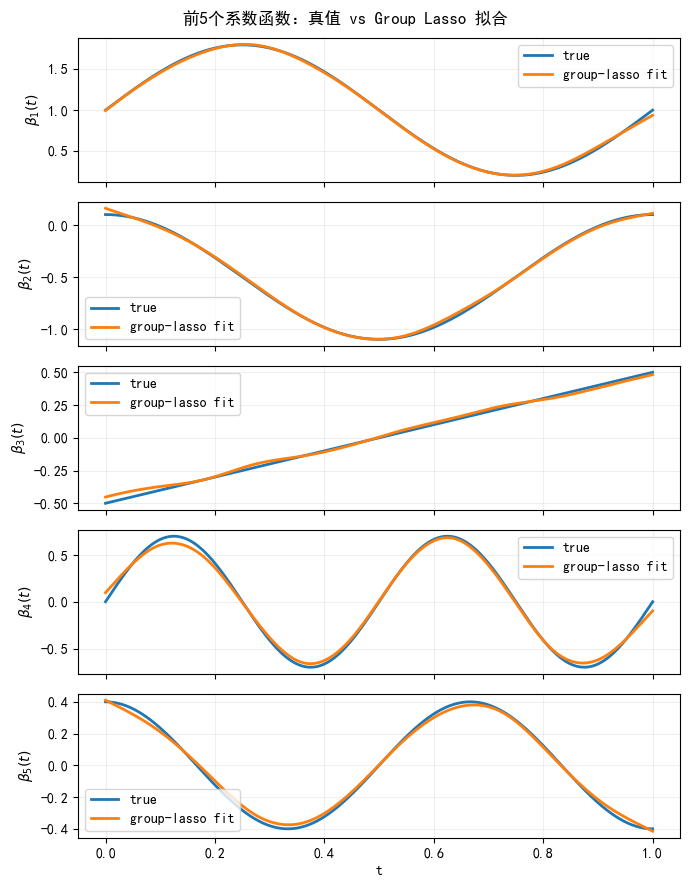

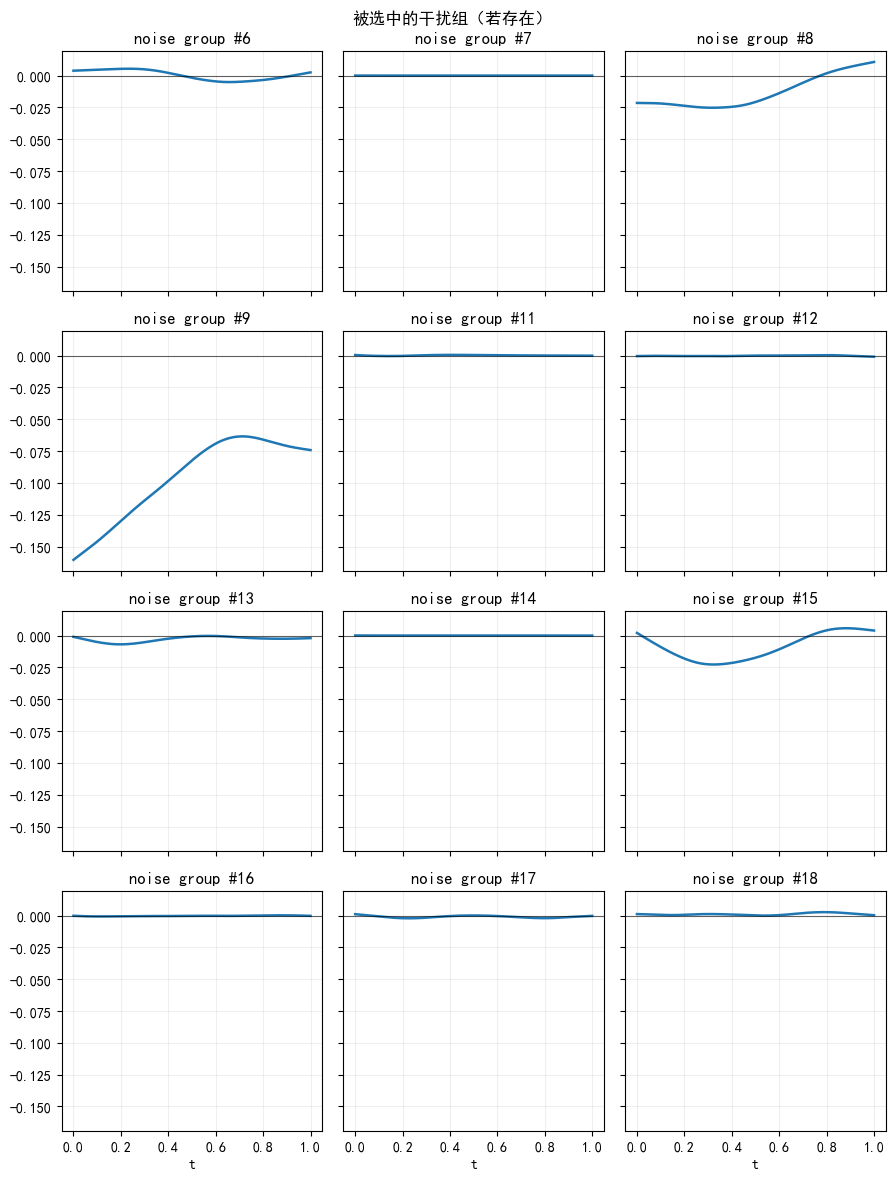

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], 

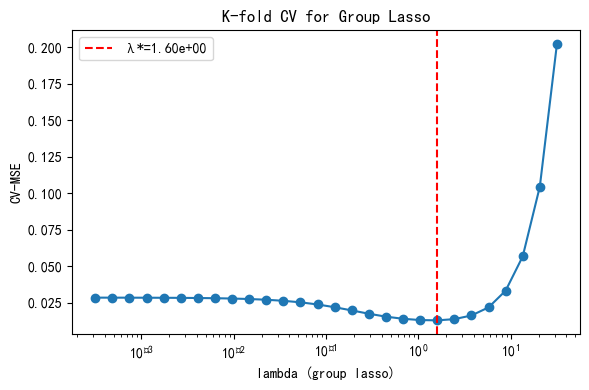

In [15]:
import numpy as np
from scipy.interpolate import BSpline
from numpy.linalg import norm
import matplotlib.pyplot as plt

# ========== 基础：B样条、Ω、VCM设计矩阵 ==========
def bspline_design_matrix(x_eval, knots, k):
    m = len(knots) - (k + 1)
    B = np.zeros((len(x_eval), m))
    for j in range(m):
        c = np.zeros(m); c[j] = 1.0
        spline_j = BSpline(knots, c, k, extrapolate=False)
        B[:, j] = spline_j(x_eval)
    B[np.isnan(B)] = 0.0
    return B

def bspline_second_deriv_penalty(knots, k, a=None, b=None, grid=2000):
    m = len(knots) - (k + 1)
    if a is None: a = knots[0]
    if b is None: b = knots[-1]
    gx = np.linspace(a, b, grid)
    D2 = np.zeros((grid, m))
    for j in range(m):
        c = np.zeros(m); c[j] = 1.0
        spline_j = BSpline(knots, c, k, extrapolate=False)
        D2[:, j] = spline_j(gx, nu=2)
    D2[np.isnan(D2)] = 0.0
    w = np.ones(grid); w[0]*=0.5; w[-1]*=0.5
    w *= (b - a) / (grid - 1)
    return D2.T @ (D2 * w[:, None])  # Ω ≈ ∫ N'' N''

def build_vcm_design(B, X):
    blocks = [(X[:, j][:, None] * B) for j in range(X.shape[1])]
    return np.hstack(blocks)  # n × (mP)

def split_blocks(vec, m, P):
    return [vec[j*m:(j+1)*m] for j in range(P)]

def eval_beta_on_grid(xx, knots, k, coef_blocks):
    B_dense = bspline_design_matrix(xx, knots, k)
    return np.column_stack([B_dense @ cb for cb in coef_blocks])

# ========== 组权重（尺度平衡） ==========
def group_weights(B, X):
    """
    w_p = sqrt( trace(B^T diag(X_p^2) B) / n )
    直观上是该组设计块的平均能量，做尺度归一后组阈值更公平。
    """
    n, m = B.shape
    P = X.shape[1]
    w = np.zeros(P)
    x2 = X**2
    for p in range(P):
        # trace(B^T diag(x_p^2) B) = sum_i x_ip^2 * ||B[i,:]||^2
        w[p] = np.sqrt(np.sum(x2[:, p] * np.sum(B*B, axis=1)) / n + 1e-12)
    return w

# ========== 功率迭代估 Lipschitz 常数 ==========
def power_iteration_max_eig(A_mul, d, iters=50):
    """
    近似 max eigenvalue of symmetric PSD linear operator A via power iteration.
    A_mul(v) 返回 A v；d 是维度。
    """
    v = np.random.randn(d); v /= norm(v) + 1e-12
    lam = 0.0
    for _ in range(iters):
        Av = A_mul(v)
        lam_new = float(np.dot(v, Av))
        nv = norm(Av)
        if nv == 0: break
        v = Av / nv
        if abs(lam_new - lam) < 1e-6 * (1 + abs(lam)):
            lam = lam_new; break
        lam = lam_new
    return max(lam, 1e-12)

# ========== FISTA：带平滑二次项的 Group Lasso ==========
def group_soft_threshold(blocks, tau, weights):
    """对每组做 v -> (1 - tau*w/||v||)_+ * v"""
    out = []
    for v, w in zip(blocks, weights):
        nv = norm(v)
        if nv <= tau*w:
            out.append(np.zeros_like(v))
        else:
            out.append((1.0 - tau*w/nv) * v)
    return out

def fista_group_lasso(XtX, Xty, Omega_blk, lam, w, m, P, max_iter=2000, tol=1e-6):
    """
    目标: 0.5||y - X̃c||^2 + 0.5 c^T Omega_blk c + lam * sum_p w_p ||c_p||_2
    其中 Omega_blk = alpha * (I_P ⊗ Ω)，可为零矩阵以关闭平滑（alpha=0）。
    使用 FISTA （对可导部分 g(c) = 0.5 c^T (XtX+Omega_blk) c - c^T Xty）
    """
    d = XtX.shape[0]  # d = mP

    # A = XtX + Omega_blk;   grad = A c - Xty
    def A_mul(v):
        return XtX @ v + Omega_blk @ v

    L = power_iteration_max_eig(A_mul, d, iters=80)  # Lipschitz of ∇g
    step = 1.0 / L

    c = np.zeros(d)
    z = c.copy()
    t = 1.0

    for it in range(max_iter):
        # gradient at z
        grad = A_mul(z) - Xty
        y = z - step * grad

        # prox by groups
        y_blocks = split_blocks(y, m, P)
        c_new_blocks = group_soft_threshold(y_blocks, tau=lam*step, weights=w)
        c_new = np.concatenate(c_new_blocks)

        t_new = 0.5 * (1 + np.sqrt(1 + 4*t*t))
        z = c_new + (t - 1)/t_new * (c_new - c)
        # 收敛判据
        if norm(c_new - c) <= tol * max(1.0, norm(c)):
            return c_new
        c, t = c_new, t_new

    return c  # 到迭代上限也返回

# ========== K 折 CV 选 λ ==========
def kfold_indices(n, K=5, seed=0):
    rng = np.random.default_rng(seed)
    idx = np.arange(n)
    rng.shuffle(idx)
    folds = np.array_split(idx, K)
    return folds

def crossval_group_lasso(t, X, y, knots, k, alpha=1e-3, lambdas=None, K=5, seed=0):
    """
    alpha: 平滑强度 (对应上式中的 α)，建议与之前 GCV 里的 λ 同量级或略小
    lambdas: 组稀疏的 λ 搜索网格
    """
    if lambdas is None:
        lambdas = np.logspace(-4, 1.5, 30)  # 可按需要扩展

    # 共同的 B, Ω
    B = bspline_design_matrix(t, knots, k)
    Omega = bspline_second_deriv_penalty(knots, k, a=float(t.min()), b=float(t.max()), grid=2000)
    n, m = B.shape
    P = X.shape[1]
    Xtilde = build_vcm_design(B, X)          # n × (mP)
    XtX_full = Xtilde.T @ Xtilde             # (mP)×(mP)
    Xty_full = Xtilde.T @ y
    Omega_blk = np.kron(np.eye(P), alpha * Omega)  # α(I⊗Ω)
    w = group_weights(B, X)                  # 组权重

    folds = kfold_indices(n, K=K, seed=seed)
    mse_path = np.zeros(len(lambdas))

    for li, lam in enumerate(lambdas):
        cv_err = 0.0
        for kf in range(K):
            val_idx = folds[kf]
            tr_idx = np.setdiff1d(np.arange(n), val_idx, assume_unique=False)

            # 子集矩阵（直接子集更方便）
            B_tr, B_val = B[tr_idx], B[val_idx]
            X_tr, X_val = X[tr_idx], X[val_idx]
            y_tr, y_val = y[tr_idx], y[val_idx]

            Xtilde_tr = build_vcm_design(B_tr, X_tr)
            Xtilde_val = build_vcm_design(B_val, X_val)

            XtX = Xtilde_tr.T @ Xtilde_tr
            Xty = Xtilde_tr.T @ y_tr
            # 同一 α、Ω：Omega_blk 不变

            c_hat = fista_group_lasso(XtX, Xty, Omega_blk, lam, w, m, P, max_iter=2000, tol=1e-6)
            y_pred = Xtilde_val @ c_hat
            cv_err += np.mean((y_val - y_pred)**2)
        mse_path[li] = cv_err / K

    best_idx = int(np.argmin(mse_path))
    lam_star = float(lambdas[best_idx])

    # 用全数据在 λ* 上再拟合一次
    c_star = fista_group_lasso(XtX_full, Xty_full, Omega_blk, lam_star, w, m, P, max_iter=4000, tol=1e-7)
    yhat = Xtilde @ c_star
    rmse = float(np.sqrt(np.mean((y - yhat)**2)))

    return lam_star, c_star, yhat, rmse, (B, Omega, Xtilde, w, mse_path, lambdas)

# ================== 演示：5个有效 + 95个干扰 ==================
if __name__ == "__main__":
    np.random.seed(123)

    # ----- 数据 -----
    n = 600
    P_sig = 5
    P_noise = 95
    P = P_sig + P_noise

    t = np.sort(np.random.rand(n))
    X_sig = np.random.randn(n, P_sig)
    # 标准化便于公平
    X_sig = (X_sig - X_sig.mean(axis=0)) / (X_sig.std(axis=0) + 1e-12)
    # 干扰（真 β=0）
    X_noise = np.random.randn(n, P_noise)
    X_noise = (X_noise - X_noise.mean(axis=0)) / (X_noise.std(axis=0) + 1e-12)*0.01
    X = np.hstack([X_sig, X_noise])

    # 真 β_p(t)
    def b1(u): return 1.0 + 0.8*np.sin(2*np.pi*u)
    def b2(u): return -0.5 + 0.6*np.cos(2*np.pi*u)
    def b3(u): return (u - 0.5)
    def b4(u): return 0.7*np.sin(4*np.pi*u)
    def b5(u): return 0.4*np.cos(3*np.pi*u)
    beta_funcs = [b1, b2, b3, b4, b5]

    beta_true = np.column_stack([f(t) for f in beta_funcs])  # n×5
    signal = np.sum(X_sig * beta_true, axis=1)
    y = signal + 0.1*np.random.randn(n)

    # ----- B样条配置 -----
    k = 3
    n_inner = 10
    inner = np.linspace(0, 1, n_inner + 2)[1:-1]
    knots = np.r_[np.repeat(0.0, k+1), inner, np.repeat(1.0, k+1)]

    # ----- 交叉验证选择 (λ_gl)，设定平滑强度 α -----
    alpha = 1e-3  # 与你之前GCV得到的数量级相近；可调大/小做偏差-方差权衡
    lambdas = np.logspace(-3.5, 1.5, 28)  # 搜索更宽
    lam_star, c_star, yhat, rmse, pack = crossval_group_lasso(
        t, X, y, knots, k, alpha=alpha, lambdas=lambdas, K=5, seed=2025
    )
    B, Omega, Xtilde, w, mse_path, lambdas = pack

    m = B.shape[1]
    coef_blocks = split_blocks(c_star, m, P)
    selected = [p for p, cp in enumerate(coef_blocks) if norm(cp) > 1e-6]
    n_sel = len(selected)

    print(f"[GL+Smooth] alpha={alpha:.1e},  lambda*={lam_star:.3e},  RMSE={rmse:.4f}")
    print(f"Selected groups: {n_sel} / {P}")
    print("Top selected (first 15 ids):", selected[:15])

    # ----- 可视化：前5个（有效）真值 vs 估计 -----
    xx = np.linspace(0, 1, 400)
    betas_hat = eval_beta_on_grid(xx, knots, k, coef_blocks)

    # 中文字体（避免乱码；若系统无这些字体可注释掉）
    import matplotlib
    matplotlib.rcParams['font.sans-serif'] = ['SimHei', 'Noto Sans CJK SC', 'Microsoft YaHei']
    matplotlib.rcParams['axes.unicode_minus'] = False

    fig, axes = plt.subplots(5, 1, figsize=(7, 9), sharex=True)
    titles = [r"$\beta_1(t)$", r"$\beta_2(t)$", r"$\beta_3(t)$", r"$\beta_4(t)$", r"$\beta_5(t)$"]
    for p in range(5):
        axes[p].plot(xx, beta_funcs[p](xx), lw=2, label="true")
        axes[p].plot(xx, betas_hat[:, p], lw=2, label="group-lasso fit")
        axes[p].set_ylabel(titles[p]); axes[p].grid(alpha=0.2); axes[p].legend(loc="best")
    axes[-1].set_xlabel("t")
    fig.suptitle("前5个系数函数：真值 vs Group Lasso 拟合")
    plt.tight_layout()
    plt.show()

    # ----- 可视化：被选中的干扰组（应大多被压成 0；若被选出，曲线也应很小） -----
    sel_noise_ids = [p for p in selected if p >= 5]
    if len(sel_noise_ids) > 0:
        r = min(len(sel_noise_ids), 12)
        nrow = int(np.ceil(r/3))
        fig2, axes2 = plt.subplots(nrow, 3, figsize=(9, 3*nrow), sharex=True, sharey=True)
        axes2 = np.array(axes2).ravel()
        for i in range(r):
            p = sel_noise_ids[i]
            axes2[i].plot(xx, betas_hat[:, p], lw=1.8)
            axes2[i].axhline(0, lw=0.8, color='k', alpha=0.6)
            axes2[i].set_title(f"noise group #{p+1}")
            axes2[i].grid(alpha=0.2)
        for ax in axes2[-3:]: ax.set_xlabel("t")
        fig2.suptitle("被选中的干扰组（若存在）")
        plt.tight_layout()
        plt.show()

    # ----- λ 路径的 CV 曲线 -----
    plt.figure(figsize=(6,4))
    plt.semilogx(lambdas, mse_path, marker='o')
    plt.axvline(lam_star, ls='--', color='r', label=f"λ*={lam_star:.2e}")
    plt.xlabel("lambda (group lasso)"); plt.ylabel("CV-MSE")
    plt.title("K-fold CV for Group Lasso")
    plt.legend(); plt.tight_layout(); plt.show()


[GL-R(weighted)] lambda* = 3.720e-01
[GL-R(weighted)] Selected groups: 36 / 100
[GL-R(weighted)] Train RMSE: 0.0801
Selected ids (first 30): [3, 5, 7, 9, 10, 11, 16, 17, 23, 25, 26, 27, 28, 32, 37, 38, 39, 42, 43, 44, 48, 52, 57, 59, 67, 68, 75, 76, 78, 80]
TP=5, FP=31, FN=0 | Precision=0.139, Recall=1.000


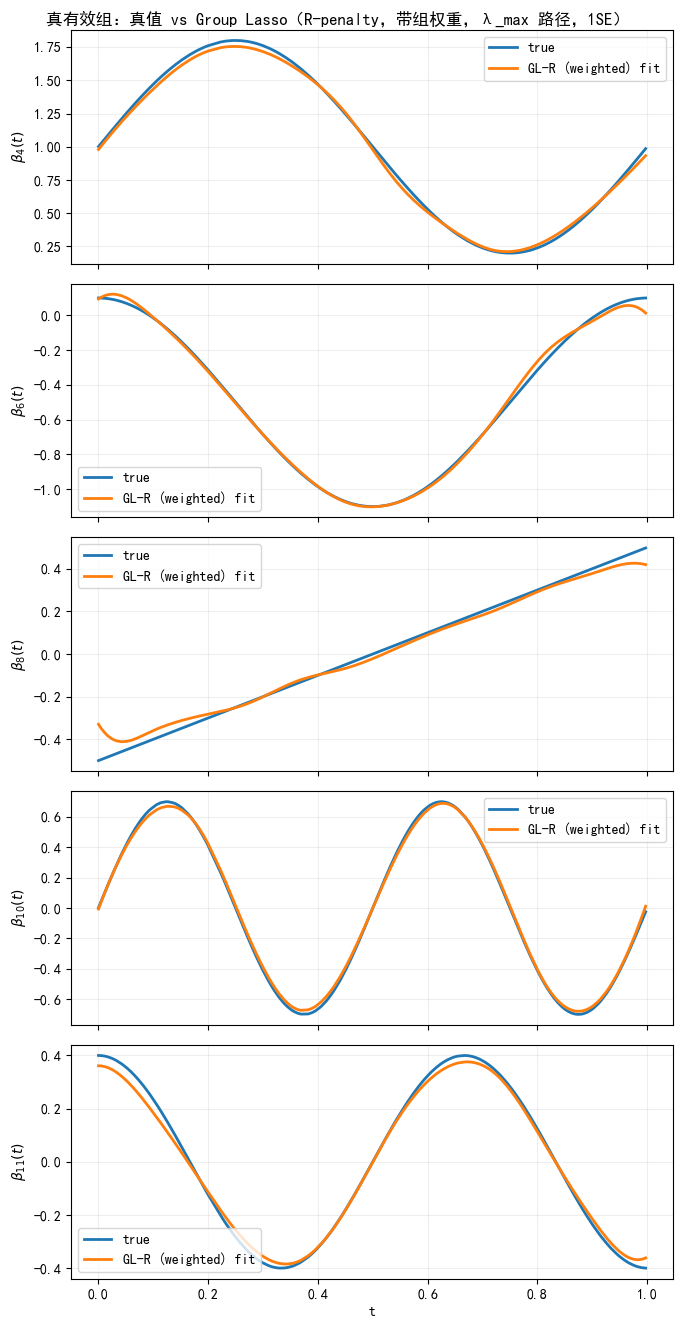

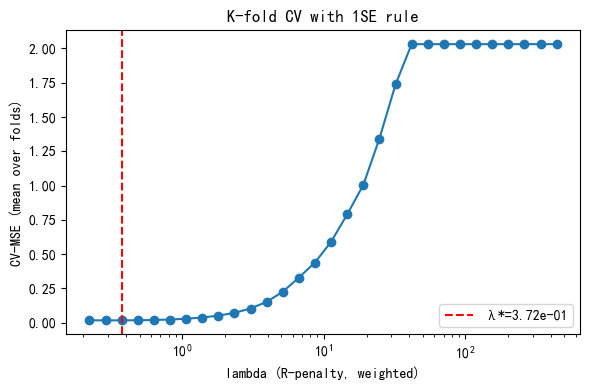

In [ ]:
# ============================ 论文原文模式 Group Lasso (R-penalty) ============================
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm
from scipy.interpolate import BSpline

# -------------------- 0) 实验可调超参 --------------------
# 有效变量位置（随便换，检验算法是否“真正选择”）
signal_idx = [3, 5, 7, 9, 10]
n = 400
P = 100
noise_sigma = 0.1
seed_data = 0
seed_cv = 2025

# B样条设置
k = 3                    # 三次样条
n_inner = 10             # 内部结点数（可调）
# 1SE 
use_1se = True

# -------------------- 1) 数据生成（支持任意 signal_idx） --------------------
def generate_vcm_data(n=400, P=100, signal_idx=(0,1,2,3,4), sigma=0.3, seed=0):
    rng = np.random.default_rng(seed)
    t = np.sort(rng.random(n))
    X = rng.standard_normal((n, P))
    X = (X - X.mean(0)) / (X.std(0) + 1e-12)

    # 5个基准真函数（可扩展）
    funcs = [
        lambda u: 1.0 + 0.8*np.sin(2*np.pi*u),
        lambda u: -0.5 + 0.6*np.cos(2*np.pi*u),
        lambda u: u - 0.5,
        lambda u: 0.7*np.sin(4*np.pi*u),
        lambda u: 0.4*np.cos(3*np.pi*u),
    ]
    beta_true = np.zeros((n, P))
    for j, idx in enumerate(signal_idx):
        beta_true[:, idx] = funcs[j % len(funcs)](t)

    y = np.sum(X * beta_true, axis=1) + sigma * rng.standard_normal(n)
    return t, X, y, beta_true, funcs

t, X, y, beta_true, beta_funcs = generate_vcm_data(n=n, P=P, signal_idx=signal_idx, sigma=noise_sigma, seed=seed_data)

# -------------------- 2) B样条与大设计矩阵 --------------------
def bspline_design_matrix(x_eval, knots, k):
    m = len(knots) - (k + 1)
    B = np.zeros((len(x_eval), m))
    for j in range(m):
        c = np.zeros(m); c[j] = 1.0
        spline_j = BSpline(knots, c, k, extrapolate=False)
        B[:, j] = spline_j(x_eval)
    B[np.isnan(B)] = 0.0
    return B

def make_open_uniform_knots(a, b, k, n_inner):
    # 开放均匀结点：端点重复 k+1 次
    inner = np.linspace(a, b, n_inner + 2)[1:-1] if n_inner>0 else np.array([])
    return np.r_[np.repeat(a, k+1), inner, np.repeat(b, k+1)]

def build_vcm_design(B, X):
    n, m = B.shape; P = X.shape[1]
    out = np.zeros((n, m*P))
    for p in range(P):
        out[:, p*m:(p+1)*m] = X[:, [p]] * B
    return out

def split_blocks(vec, m, P):
    return [vec[p*m:(p+1)*m] for p in range(P)]

# 结点与基矩阵
knots = make_open_uniform_knots(float(t.min()), float(t.max()), k, n_inner)
B = bspline_design_matrix(t, knots, k)
n, m = B.shape
Xtilde = build_vcm_design(B, X)

# -------------------- 3) 文章里的 R 矩阵、组权重、λ_max --------------------
def gram_R_from_grid(knots, k, a, b, grid=2000):
    gx = np.linspace(a, b, grid)
    B_dense = bspline_design_matrix(gx, knots, k)
    w = np.ones(grid); w[0]*=0.5; w[-1]*=0.5
    w *= (b - a) / (grid - 1)
    return B_dense.T @ (B_dense * w[:, None])          # m×m

def group_weights_by_design(B, X):
    # w_p = sqrt( (1/n) * sum_i x_{ip}^2 * ||B[i,:]||^2 ) ：只看设计，不看 y
    row_energy = np.sum(B*B, axis=1)
    return np.sqrt((X**2 * row_energy[:, None]).sum(axis=0)/B.shape[0] + 1e-12)

def lambda_max_R(Xtilde, y, m, R):
    # λ_max = max_p || R^{-1/2} (X̃_p^T y) ||_2
    L = np.linalg.cholesky(R)
    P = Xtilde.shape[1] // m
    lam_max = 0.0
    for p in range(P):
        g = Xtilde[:, p*m:(p+1)*m].T @ y
        u = np.linalg.solve(L.T, g)
        lam_max = max(lam_max, float(norm(u)))
    return lam_max

R = gram_R_from_grid(knots, k, a=float(t.min()), b=float(t.max()), grid=2000)
w = group_weights_by_design(B, X)
lam_max = lambda_max_R(Xtilde, y, m, R)
# λ 路径从“全零解”覆盖到 1e-3 * λ_max（可按需加宽/缩窄）
lambdas = np.geomspace(lam_max, lam_max*5e-4, 30)

# -------------------- 4) 近端算子与 FISTA（带权重） --------------------
def group_soft_threshold_R_weighted(blocks, tau, R, lam, w):
    out = []
    for v, wp in zip(blocks, w):
        nr = float(np.sqrt(max(0.0, v.T @ R @ v)))
        thr = tau * lam * float(wp)
        if nr <= thr:
            out.append(np.zeros_like(v))
        else:
            out.append((1.0 - thr/nr) * v)
    return out

def fista_group_lasso_R_weighted(XtX, Xty, lam, m, P, R, w, max_iter=3000, tol=1e-6):
    d = m * P
    Ls = float(np.linalg.norm(XtX, 2))
    if not np.isfinite(Ls) or Ls <= 0: Ls = 1.0
    step = 1.0 / Ls
    c = np.zeros(d); z = c.copy(); tN = 1.0
    for _ in range(max_iter):
        grad = XtX @ z - Xty
        yv = z - step * grad
        y_blocks = split_blocks(yv, m, P)
        c_new_blocks = group_soft_threshold_R_weighted(y_blocks, step, R, lam, w)
        c_new = np.concatenate(c_new_blocks)
        t_new = 0.5*(1 + np.sqrt(1 + 4*tN*tN))
        z = c_new + (tN-1)/t_new * (c_new - c)
        if norm(c_new - c) <= tol * max(1.0, norm(c)): return c_new
        c, tN = c_new, t_new
    return c

# -------------------- 5) K 折 CV + 1SE 规则选择 λ* --------------------
def kfold_indices(n, K=5, seed=0):
    rng = np.random.default_rng(seed)
    idx = np.arange(n); rng.shuffle(idx)
    return np.array_split(idx, K)

def cv_select_lambda(B, X, y, R, w, lambdas, K=5, seed=2025, max_iter=3000, tol=1e-6, use_1se=True):
    n, m = B.shape; P = X.shape[1]
    folds = kfold_indices(n, K=K, seed=seed)
    mse_folds = np.zeros((len(lambdas), K))
    for li, lam in enumerate(lambdas):
        for kf, val_idx in enumerate(folds):
            tr_idx = np.setdiff1d(np.arange(n), val_idx)
            B_tr, B_val = B[tr_idx], B[val_idx]
            X_tr, X_val = X[tr_idx], X[val_idx]
            y_tr, y_val = y[tr_idx], y[val_idx]
            Xtilde_tr = build_vcm_design(B_tr, X_tr)
            Xtilde_val = build_vcm_design(B_val, X_val)
            XtX_tr = Xtilde_tr.T @ Xtilde_tr
            Xty_tr = Xtilde_tr.T @ y_tr
            c_hat = fista_group_lasso_R_weighted(XtX_tr, Xty_tr, lam, m, P, R, w, max_iter=max_iter, tol=tol)
            y_pred = Xtilde_val @ c_hat
            mse_folds[li, kf] = np.mean((y_val - y_pred)**2)
    mse_mean = mse_folds.mean(1)
    best = int(np.argmin(mse_mean))
    if use_1se:
        se = mse_folds.std(1, ddof=1) / np.sqrt(K)
        target = mse_mean[best] + se[best]
        # lambdas 是从大到小的几何序列，挑满足均值<=target的“最左端”（更大λ，更稀疏）
        idxs = np.where(mse_mean <= target)[0]
        best = int(idxs[0])
    return float(lambdas[best]), mse_mean, mse_folds

lam_star, mse_mean, mse_folds = cv_select_lambda(B, X, y, R, w, lambdas, K=5, seed=seed_cv, use_1se=use_1se)

# -------------------- 6) 在 λ* 上用全数据拟合，输出指标并可视化 --------------------
XtX = Xtilde.T @ Xtilde
Xty = Xtilde.T @ y
c_star = fista_group_lasso_R_weighted(XtX, Xty, lam_star, m, P, R, w, max_iter=6000, tol=1e-7)
yhat = Xtilde @ c_star
rmse = float(np.sqrt(np.mean((y - yhat)**2)))

coef_blocks = split_blocks(c_star, m, P)
# 选择阈值用 R-范数
rnorms = np.array([float(np.sqrt(max(0.0, cb.T @ R @ cb))) for cb in coef_blocks])
selected = np.where(rnorms > 1e-6)[0].tolist()

# 选择性能
S, Sel = set(signal_idx), set(selected)
TP, FP, FN = len(S & Sel), len(Sel - S), len(S - Sel)
precision = TP / max(1, TP+FP)
recall = TP / max(1, TP+FN)

print(f"[GL-R(weighted)] lambda* = {lam_star:.3e}")
print(f"[GL-R(weighted)] Selected groups: {len(selected)} / {P}")
print(f"[GL-R(weighted)] Train RMSE: {rmse:.4f}")
print(f"Selected ids (first 30): {sorted(selected)[:30]}")
print(f"TP={TP}, FP={FP}, FN={FN} | Precision={precision:.3f}, Recall={recall:.3f}")

# 在 t 上评估 β̂(t)
betas_hat_t = np.column_stack([B @ cb for cb in coef_blocks])
order = np.argsort(t)

# 画“真有效组”的真值 vs 拟合
r = min(len(signal_idx), 5)
fig, axes = plt.subplots(r, 1, figsize=(7, 1.9*r+4), sharex=True)
if r == 1: axes = [axes]
for ax, p in zip(axes, signal_idx[:r]):
    ax.plot(t[order], beta_true[order, p], lw=2, label="true")
    ax.plot(t[order], betas_hat_t[order, p], lw=2, label="GL-R (weighted) fit")
    ax.set_ylabel(fr"$\beta_{{{p+1}}}(t)$")
    ax.grid(alpha=0.2); ax.legend(loc="best")
axes[-1].set_xlabel("t")
fig.suptitle("真有效组：真值 vs Group Lasso（R-penalty，带组权重，λ_max 路径，1SE）")
plt.tight_layout(); plt.show()

# 画 CV 曲线
plt.figure(figsize=(6,4))
plt.semilogx(lambdas, mse_mean, marker='o')
plt.axvline(lam_star, ls='--', color='r', label=f"λ*={lam_star:.2e}")
plt.xlabel("lambda (R-penalty, weighted)")
plt.ylabel("CV-MSE (mean over folds)")
plt.title("K-fold CV with 1SE rule" if use_1se else "K-fold CV (mean)")
plt.legend(); plt.tight_layout(); plt.show()
# =====================================================================================================



===== Adaptive Group Lasso 实验结果 =====
Step 1: λ*=3.720e-01, 选中 36 组
 -> TP=5, FP=31, FN=0, Precision=0.139, Recall=1.000
Step 2 (Adaptive): λ*=2.203e-01, 选中 5 组
 -> TP=5, FP=0, FN=0, Precision=1.000, Recall=1.000
最终选择组 (前30): [3, 5, 7, 9, 10]


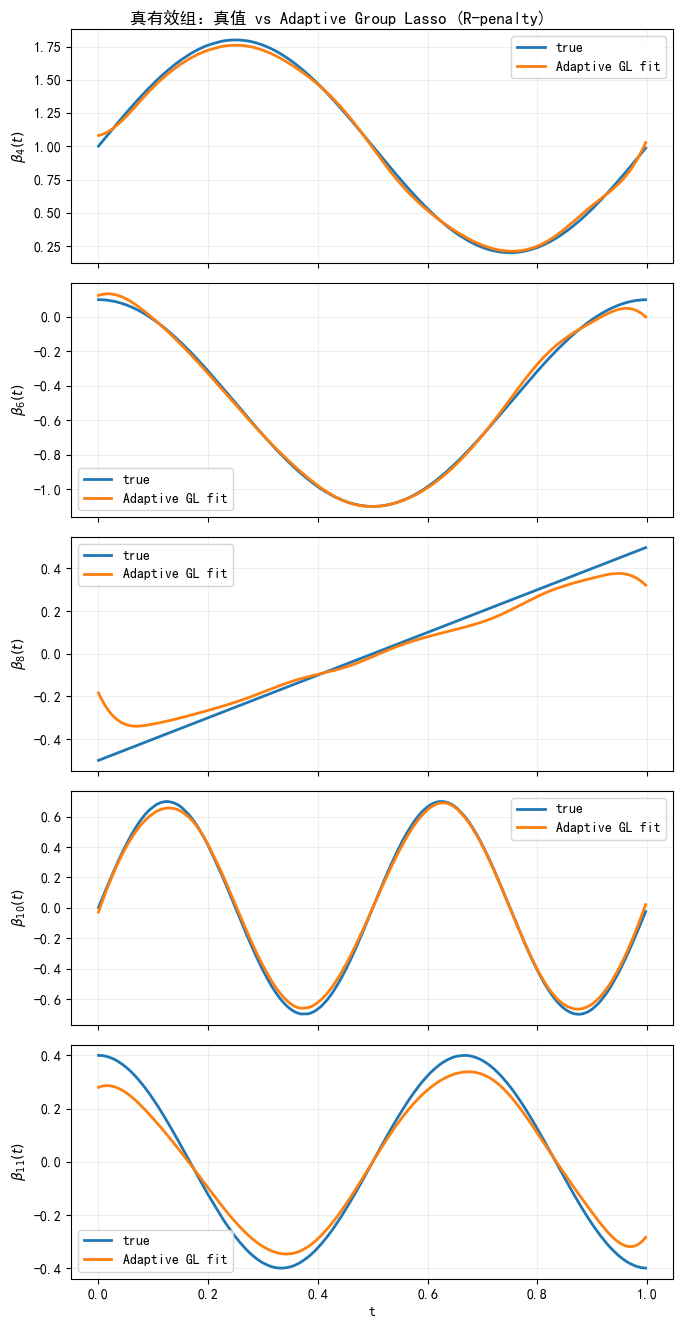

In [27]:
# ============================ 补充实验：Adaptive Group Lasso (R-penalty) ============================

def adaptive_group_weights(coef_blocks, R, delta=1.0, eps=1e-6):
    """基于初步估计的 Adaptive 权重"""
    w_adapt = []
    for cb in coef_blocks:
        nr = float(np.sqrt(max(0.0, cb.T @ R @ cb)))
        w_adapt.append(1.0 / (nr + eps)**delta)
    return np.array(w_adapt)

def run_adaptive_group_lasso(t, X, y, knots, k, R, base_weights,
                             lambdas, delta=1.0, use_1se=True, seed=2025):
    """两步法：先普通GL，再Adaptive GL"""
    B = bspline_design_matrix(t, knots, k); m = B.shape[1]; P = X.shape[1]
    Xtilde = build_vcm_design(B, X)
    XtX, Xty = Xtilde.T @ Xtilde, Xtilde.T @ y

    # === Step 1: 初步估计（用 base_weights，比如 design-based 权重） ===
    lam_star1, mse_mean1, mse_folds1 = cv_select_lambda(
        B, X, y, R, base_weights, lambdas,
        K=5, seed=seed, use_1se=use_1se
    )
    c_init = fista_group_lasso_R_weighted(XtX, Xty, lam_star1, m, P, R, base_weights)
    coef_blocks_init = split_blocks(c_init, m, P)

    # === Step 2: Adaptive 权重 ===
    w_adapt = adaptive_group_weights(coef_blocks_init, R, delta=delta, eps=1e-6)

    # 再次CV选择 λ
    lam_star2, mse_mean2, mse_folds2 = cv_select_lambda(
        B, X, y, R, w_adapt, lambdas,
        K=5, seed=seed, use_1se=use_1se
    )
    c_final = fista_group_lasso_R_weighted(XtX, Xty, lam_star2, m, P, R, w_adapt,
                                           max_iter=6000, tol=1e-7)
    coef_blocks_final = split_blocks(c_final, m, P)

    return lam_star1, c_init, coef_blocks_init, lam_star2, c_final, coef_blocks_final

# -------------------- 运行 Adaptive Group Lasso --------------------
lam1, c_init, coef_blocks_init, lam2, c_final, coef_blocks_final = run_adaptive_group_lasso(
    t, X, y, knots, k, R, w, lambdas, delta=1.0, use_1se=True, seed=seed_cv
)

# R-范数选择结果
rnorms_init = np.array([float(np.sqrt(max(0.0, cb.T @ R @ cb))) for cb in coef_blocks_init])
rnorms_final = np.array([float(np.sqrt(max(0.0, cb.T @ R @ cb))) for cb in coef_blocks_final])
selected_init = np.where(rnorms_init > 1e-6)[0].tolist()
selected_final = np.where(rnorms_final > 1e-6)[0].tolist()

# 选择性能
S = set(signal_idx)
def eval_selection(selected):
    Sel = set(selected)
    TP, FP, FN = len(S & Sel), len(Sel - S), len(S - Sel)
    prec = TP / max(1, TP+FP); rec = TP / max(1, TP+FN)
    return TP, FP, FN, prec, rec

TP1, FP1, FN1, prec1, rec1 = eval_selection(selected_init)
TP2, FP2, FN2, prec2, rec2 = eval_selection(selected_final)

print("\n===== Adaptive Group Lasso 实验结果 =====")
print(f"Step 1: λ*={lam1:.3e}, 选中 {len(selected_init)} 组")
print(f" -> TP={TP1}, FP={FP1}, FN={FN1}, Precision={prec1:.3f}, Recall={rec1:.3f}")
print(f"Step 2 (Adaptive): λ*={lam2:.3e}, 选中 {len(selected_final)} 组")
print(f" -> TP={TP2}, FP={FP2}, FN={FN2}, Precision={prec2:.3f}, Recall={rec2:.3f}")
print("最终选择组 (前30):", sorted(selected_final)[:30])

# -------------------- 可视化：真有效组的拟合（Adaptive版） --------------------
betas_hat_t = np.column_stack([B @ cb for cb in coef_blocks_final])
order = np.argsort(t)
r = min(len(signal_idx), 5)
fig, axes = plt.subplots(r, 1, figsize=(7, 1.9*r+4), sharex=True)
if r == 1: axes=[axes]
for ax, p in zip(axes, signal_idx[:r]):
    ax.plot(t[order], beta_true[order, p], lw=2, label="true")
    ax.plot(t[order], betas_hat_t[order, p], lw=2, label="Adaptive GL fit")
    ax.set_ylabel(fr"$\beta_{{{p+1}}}(t)$")
    ax.grid(alpha=0.2); ax.legend()
axes[-1].set_xlabel("t")
fig.suptitle("真有效组：真值 vs Adaptive Group Lasso (R-penalty)")
plt.tight_layout(); plt.show()


[GL-R(weighted)] lambda* = 3.244e-01
[GL-R(weighted)] Selected groups: 26 / 100
[GL-R(weighted)] Train RMSE: 0.0850
Selected ids (first 30): [3, 5, 7, 8, 9, 10, 16, 23, 27, 29, 32, 37, 43, 48, 52, 55, 57, 61, 67, 68, 75, 78, 85, 90, 94, 96]
TP=5, FP=21, FN=0 | Precision=0.192, Recall=1.000


C:\Users\volcawang\AppData\Local\Temp\ipykernel_42236\1690447417.py:229: UserWarning: Glyph 30495 (\N{CJK UNIFIED IDEOGRAPH-771F}) missing from font(s) DejaVu Sans.
  plt.tight_layout(); plt.show()
C:\Users\volcawang\AppData\Local\Temp\ipykernel_42236\1690447417.py:229: UserWarning: Glyph 26377 (\N{CJK UNIFIED IDEOGRAPH-6709}) missing from font(s) DejaVu Sans.
  plt.tight_layout(); plt.show()
C:\Users\volcawang\AppData\Local\Temp\ipykernel_42236\1690447417.py:229: UserWarning: Glyph 25928 (\N{CJK UNIFIED IDEOGRAPH-6548}) missing from font(s) DejaVu Sans.
  plt.tight_layout(); plt.show()
C:\Users\volcawang\AppData\Local\Temp\ipykernel_42236\1690447417.py:229: UserWarning: Glyph 32452 (\N{CJK UNIFIED IDEOGRAPH-7EC4}) missing from font(s) DejaVu Sans.
  plt.tight_layout(); plt.show()
C:\Users\volcawang\AppData\Local\Temp\ipykernel_42236\1690447417.py:229: UserWarning: Glyph 65306 (\N{FULLWIDTH COLON}) missing from font(s) DejaVu Sans.
  plt.tight_layout(); plt.show()
C:\Users\volcawang\Ap

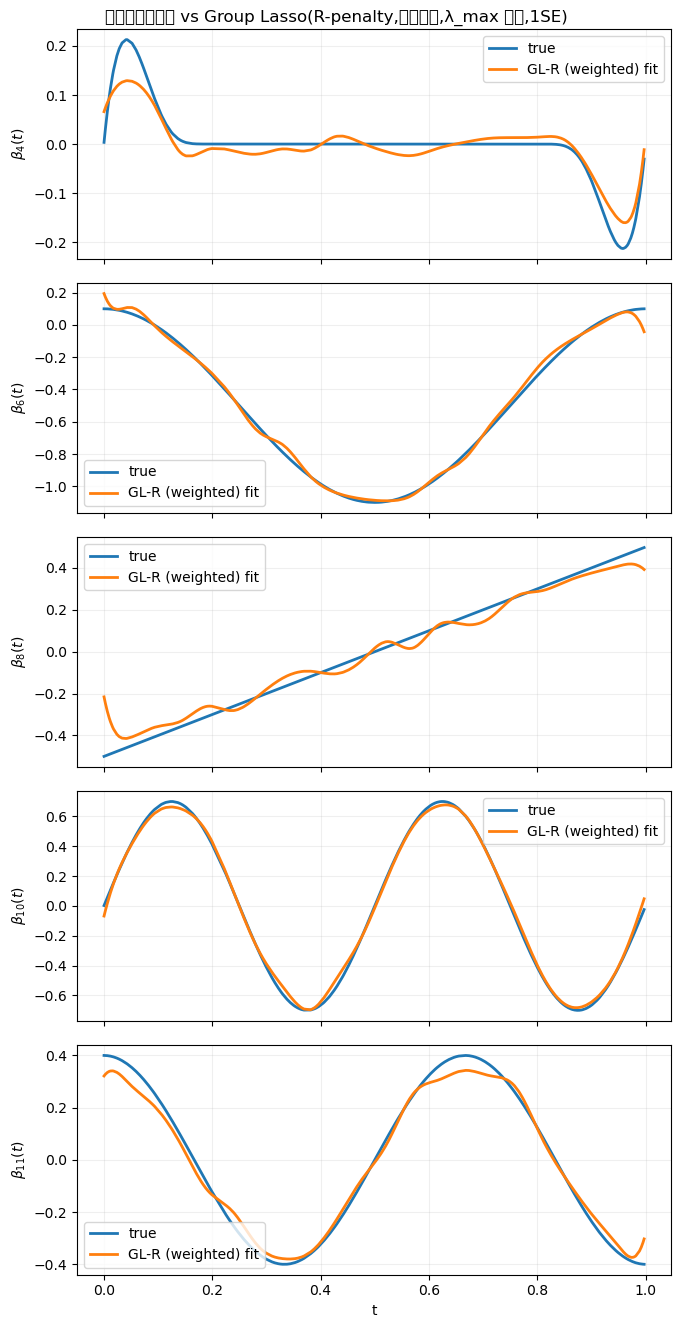

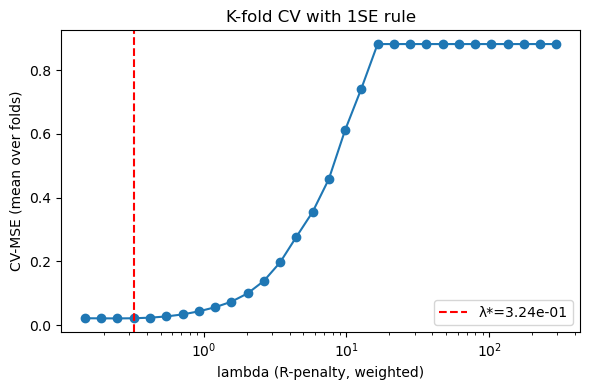

In [4]:
# ============================ 论文原文模式 Group Lasso (R-penalty) ============================
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm
from scipy.interpolate import BSpline
import numpy as np

def ghost_mask(u, a=0.3, b=0.6):
    """
    在 [a, b] 上严格为 0；离开该区间后，以 C∞ 的方式平滑升至 ~1。
    """
    # 到区间 [a, b] 的距离 t：区间内 t=0，区间外 t>0
    t = np.maximum(0.0, np.maximum(a - u, u - b))

    # C∞ 平滑升函数：m(0)=0 且在 0 处各阶导数都为 0；t→∞ 时 m→1
    m = np.zeros_like(t, dtype=float)
    outside = t > 0
    m[outside] = np.exp(-1.0 / t[outside])
    return m

# 例子：把正弦作为“基函数”，并在 [0.3, 0.6] 设为严格 0，边界处无限光滑衔接
smooth_zero_func = lambda u: np.sin(2*np.pi*u) * ghost_mask(u, a=0.3, b=0.6)

# -------------------- 0) 实验可调超参 --------------------
# 有效变量位置（随便换，检验算法是否“真正选择”）
signal_idx = [3, 5, 7, 9, 10]
n = 400
P = 100
noise_sigma = 0.1
seed_data = 0
seed_cv = 2025

# B样条设置
k = 3                    # 三次样条
n_inner = 20             # 内部结点数（可调）
# 1SE 规则：更稀疏更稳；如想更“贪心”可改为 False
use_1se = True

# -------------------- 1) 数据生成（支持任意 signal_idx） --------------------
def generate_vcm_data(n=400, P=100, signal_idx=(0,1,2,3,4), sigma=0.3, seed=0):
    rng = np.random.default_rng(seed)
    t = np.sort(rng.random(n))
    X = rng.standard_normal((n, P))
    X = (X - X.mean(0)) / (X.std(0) + 1e-12)

    # 5个基准真函数（可扩展）
    funcs = [
        lambda u: np.sin(2*np.pi*u) * ghost_mask(u, a=0.25, b=0.75)*100,
        lambda u: -0.5 + 0.6*np.cos(2*np.pi*u),
        lambda u: u - 0.5,
        lambda u: 0.7*np.sin(4*np.pi*u),
        lambda u: 0.4*np.cos(3*np.pi*u),
    ]
    beta_true = np.zeros((n, P))
    for j, idx in enumerate(signal_idx):
        beta_true[:, idx] = funcs[j % len(funcs)](t)

    y = np.sum(X * beta_true, axis=1) + sigma * rng.standard_normal(n)
    return t, X, y, beta_true, funcs

t, X, y, beta_true, beta_funcs = generate_vcm_data(n=n, P=P, signal_idx=signal_idx, sigma=noise_sigma, seed=seed_data)

# -------------------- 2) B样条与大设计矩阵 --------------------
def bspline_design_matrix(x_eval, knots, k):
    m = len(knots) - (k + 1)
    B = np.zeros((len(x_eval), m))
    for j in range(m):
        c = np.zeros(m); c[j] = 1.0
        spline_j = BSpline(knots, c, k, extrapolate=False)
        B[:, j] = spline_j(x_eval)
    B[np.isnan(B)] = 0.0
    return B

def make_open_uniform_knots(a, b, k, n_inner):
    # 开放均匀结点：端点重复 k+1 次
    inner = np.linspace(a, b, n_inner + 2)[1:-1] if n_inner>0 else np.array([])
    return np.r_[np.repeat(a, k+1), inner, np.repeat(b, k+1)]

def build_vcm_design(B, X):
    n, m = B.shape; P = X.shape[1]
    out = np.zeros((n, m*P))
    for p in range(P):
        out[:, p*m:(p+1)*m] = X[:, [p]] * B
    return out

def split_blocks(vec, m, P):
    return [vec[p*m:(p+1)*m] for p in range(P)]

# 结点与基矩阵
knots = make_open_uniform_knots(float(t.min()), float(t.max()), k, n_inner)
B = bspline_design_matrix(t, knots, k)
n, m = B.shape
Xtilde = build_vcm_design(B, X)

# -------------------- 3) 文章里的 R 矩阵、组权重、λ_max --------------------
def gram_R_from_grid(knots, k, a, b, grid=2000):
    gx = np.linspace(a, b, grid)
    B_dense = bspline_design_matrix(gx, knots, k)
    w = np.ones(grid); w[0]*=0.5; w[-1]*=0.5
    w *= (b - a) / (grid - 1)
    return B_dense.T @ (B_dense * w[:, None])          # m×m

def group_weights_by_design(B, X):
    # w_p = sqrt( (1/n) * sum_i x_{ip}^2 * ||B[i,:]||^2 ) ：只看设计，不看 y
    row_energy = np.sum(B*B, axis=1)
    return np.sqrt((X**2 * row_energy[:, None]).sum(axis=0)/B.shape[0] + 1e-12)

def lambda_max_R(Xtilde, y, m, R):
    # λ_max = max_p || R^{-1/2} (X̃_p^T y) ||_2
    L = np.linalg.cholesky(R)
    P = Xtilde.shape[1] // m
    lam_max = 0.0
    for p in range(P):
        g = Xtilde[:, p*m:(p+1)*m].T @ y
        u = np.linalg.solve(L.T, g)
        lam_max = max(lam_max, float(norm(u)))
    return lam_max

R = gram_R_from_grid(knots, k, a=float(t.min()), b=float(t.max()), grid=2000)
w = group_weights_by_design(B, X)
lam_max = lambda_max_R(Xtilde, y, m, R)
# λ 路径从“全零解”覆盖到 1e-3 * λ_max（可按需加宽/缩窄）
lambdas = np.geomspace(lam_max, lam_max*5e-4, 30)

# -------------------- 4) 近端算子与 FISTA（带权重） --------------------
def group_soft_threshold_R_weighted(blocks, tau, R, lam, w):
    out = []
    for v, wp in zip(blocks, w):
        nr = float(np.sqrt(max(0.0, v.T @ R @ v)))
        thr = tau * lam * float(wp)
        if nr <= thr:
            out.append(np.zeros_like(v))
        else:
            out.append((1.0 - thr/nr) * v)
    return out

def fista_group_lasso_R_weighted(XtX, Xty, lam, m, P, R, w, max_iter=3000, tol=1e-6):
    d = m * P
    Ls = float(np.linalg.norm(XtX, 2))
    if not np.isfinite(Ls) or Ls <= 0: Ls = 1.0
    step = 1.0 / Ls
    c = np.zeros(d); z = c.copy(); tN = 1.0
    for _ in range(max_iter):
        grad = XtX @ z - Xty
        yv = z - step * grad
        y_blocks = split_blocks(yv, m, P)
        c_new_blocks = group_soft_threshold_R_weighted(y_blocks, step, R, lam, w)
        c_new = np.concatenate(c_new_blocks)
        t_new = 0.5*(1 + np.sqrt(1 + 4*tN*tN))
        z = c_new + (tN-1)/t_new * (c_new - c)
        if norm(c_new - c) <= tol * max(1.0, norm(c)): return c_new
        c, tN = c_new, t_new
    return c

# -------------------- 5) K 折 CV + 1SE 规则选择 λ* --------------------
def kfold_indices(n, K=5, seed=0):
    rng = np.random.default_rng(seed)
    idx = np.arange(n); rng.shuffle(idx)
    return np.array_split(idx, K)

def cv_select_lambda(B, X, y, R, w, lambdas, K=5, seed=2025, max_iter=3000, tol=1e-6, use_1se=True):
    n, m = B.shape; P = X.shape[1]
    folds = kfold_indices(n, K=K, seed=seed)
    mse_folds = np.zeros((len(lambdas), K))
    for li, lam in enumerate(lambdas):
        for kf, val_idx in enumerate(folds):
            tr_idx = np.setdiff1d(np.arange(n), val_idx)
            B_tr, B_val = B[tr_idx], B[val_idx]
            X_tr, X_val = X[tr_idx], X[val_idx]
            y_tr, y_val = y[tr_idx], y[val_idx]
            Xtilde_tr = build_vcm_design(B_tr, X_tr)
            Xtilde_val = build_vcm_design(B_val, X_val)
            XtX_tr = Xtilde_tr.T @ Xtilde_tr
            Xty_tr = Xtilde_tr.T @ y_tr
            c_hat = fista_group_lasso_R_weighted(XtX_tr, Xty_tr, lam, m, P, R, w, max_iter=max_iter, tol=tol)
            y_pred = Xtilde_val @ c_hat
            mse_folds[li, kf] = np.mean((y_val - y_pred)**2)
    mse_mean = mse_folds.mean(1)
    best = int(np.argmin(mse_mean))
    if use_1se:
        se = mse_folds.std(1, ddof=1) / np.sqrt(K)
        target = mse_mean[best] + se[best]
        # lambdas 是从大到小的几何序列，挑满足均值<=target的“最左端”（更大λ，更稀疏）
        idxs = np.where(mse_mean <= target)[0]
        best = int(idxs[0])
    return float(lambdas[best]), mse_mean, mse_folds

lam_star, mse_mean, mse_folds = cv_select_lambda(B, X, y, R, w, lambdas, K=5, seed=seed_cv, use_1se=use_1se)

# -------------------- 6) 在 λ* 上用全数据拟合，输出指标并可视化 --------------------
XtX = Xtilde.T @ Xtilde
Xty = Xtilde.T @ y
c_star = fista_group_lasso_R_weighted(XtX, Xty, lam_star, m, P, R, w, max_iter=6000, tol=1e-7)
yhat = Xtilde @ c_star
rmse = float(np.sqrt(np.mean((y - yhat)**2)))

coef_blocks = split_blocks(c_star, m, P)
# 选择阈值用 R-范数
rnorms = np.array([float(np.sqrt(max(0.0, cb.T @ R @ cb))) for cb in coef_blocks])
selected = np.where(rnorms > 1e-6)[0].tolist()

# 选择性能
S, Sel = set(signal_idx), set(selected)
TP, FP, FN = len(S & Sel), len(Sel - S), len(S - Sel)
precision = TP / max(1, TP+FP)
recall = TP / max(1, TP+FN)

print(f"[GL-R(weighted)] lambda* = {lam_star:.3e}")
print(f"[GL-R(weighted)] Selected groups: {len(selected)} / {P}")
print(f"[GL-R(weighted)] Train RMSE: {rmse:.4f}")
print(f"Selected ids (first 30): {sorted(selected)[:30]}")
print(f"TP={TP}, FP={FP}, FN={FN} | Precision={precision:.3f}, Recall={recall:.3f}")

# 在 t 上评估 β̂(t)
betas_hat_t = np.column_stack([B @ cb for cb in coef_blocks])
order = np.argsort(t)

# 画“真有效组”的真值 vs 拟合
r = min(len(signal_idx), 5)
fig, axes = plt.subplots(r, 1, figsize=(7, 1.9*r+4), sharex=True)
if r == 1: axes = [axes]
for ax, p in zip(axes, signal_idx[:r]):
    ax.plot(t[order], beta_true[order, p], lw=2, label="true")
    ax.plot(t[order], betas_hat_t[order, p], lw=2, label="GL-R (weighted) fit")
    ax.set_ylabel(fr"$\beta_{{{p+1}}}(t)$")
    ax.grid(alpha=0.2); ax.legend(loc="best")
axes[-1].set_xlabel("t")
fig.suptitle("真有效组：真值 vs Group Lasso(R-penalty,带组权重,λ_max 路径,1SE)")
plt.tight_layout(); plt.show()

# 画 CV 曲线
plt.figure(figsize=(6,4))
plt.semilogx(lambdas, mse_mean, marker='o')
plt.axvline(lam_star, ls='--', color='r', label=f"λ*={lam_star:.2e}")
plt.xlabel("lambda (R-penalty, weighted)")
plt.ylabel("CV-MSE (mean over folds)")
plt.title("K-fold CV with 1SE rule" if use_1se else "K-fold CV (mean)")
plt.legend(); plt.tight_layout(); plt.show()
# =====================================================================================================



===== Adaptive Group Lasso 实验结果 =====
Step 1: λ*=3.244e-01, 选中 26 组
 -> TP=5, FP=21, FN=0, Precision=0.192, Recall=1.000
Step 2 (Adaptive): λ*=1.478e-01, 选中 4 组
 -> TP=4, FP=0, FN=1, Precision=1.000, Recall=0.800
最终选择组 (前30): [5, 7, 9, 10]


C:\Users\volcawang\AppData\Local\Temp\ipykernel_42236\3595852518.py:82: UserWarning: Glyph 30495 (\N{CJK UNIFIED IDEOGRAPH-771F}) missing from font(s) DejaVu Sans.
  plt.tight_layout(); plt.show()
C:\Users\volcawang\AppData\Local\Temp\ipykernel_42236\3595852518.py:82: UserWarning: Glyph 26377 (\N{CJK UNIFIED IDEOGRAPH-6709}) missing from font(s) DejaVu Sans.
  plt.tight_layout(); plt.show()
C:\Users\volcawang\AppData\Local\Temp\ipykernel_42236\3595852518.py:82: UserWarning: Glyph 25928 (\N{CJK UNIFIED IDEOGRAPH-6548}) missing from font(s) DejaVu Sans.
  plt.tight_layout(); plt.show()
C:\Users\volcawang\AppData\Local\Temp\ipykernel_42236\3595852518.py:82: UserWarning: Glyph 32452 (\N{CJK UNIFIED IDEOGRAPH-7EC4}) missing from font(s) DejaVu Sans.
  plt.tight_layout(); plt.show()
C:\Users\volcawang\AppData\Local\Temp\ipykernel_42236\3595852518.py:82: UserWarning: Glyph 65306 (\N{FULLWIDTH COLON}) missing from font(s) DejaVu Sans.
  plt.tight_layout(); plt.show()
C:\Users\volcawang\AppData

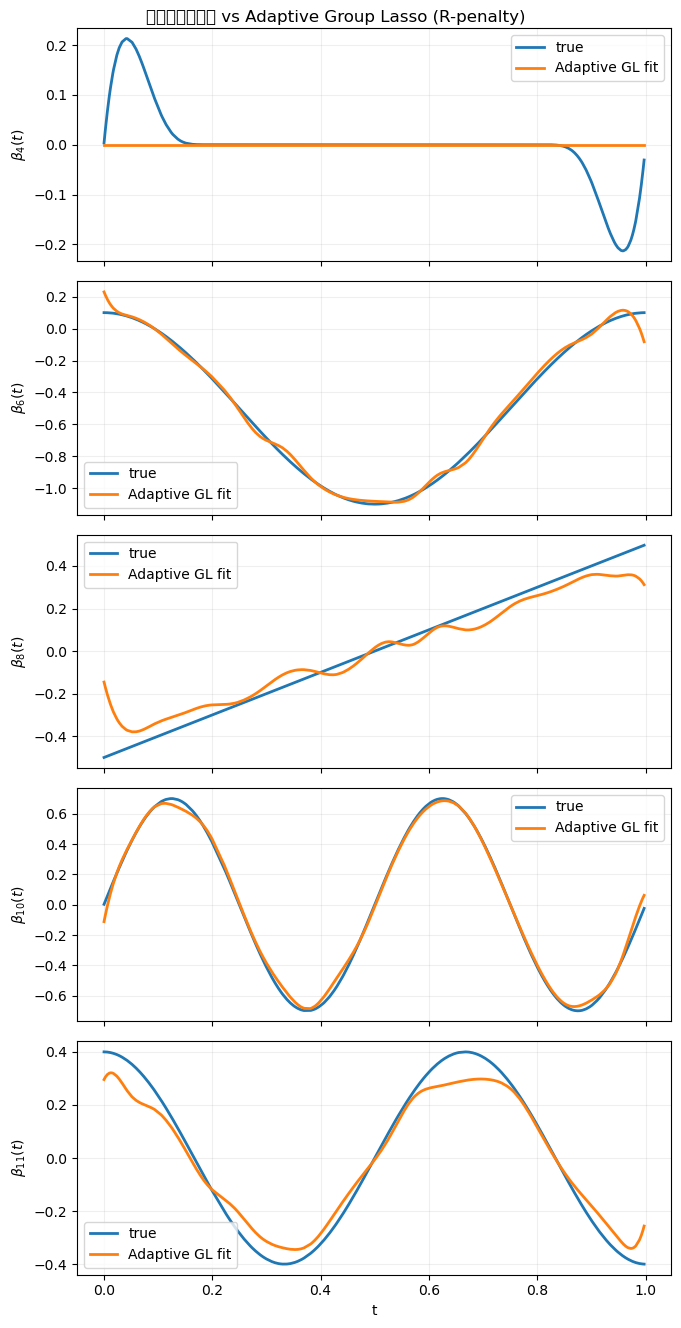

In [5]:
# ============================ 补充实验：Adaptive Group Lasso (R-penalty) ============================

def adaptive_group_weights(coef_blocks, R, delta=1.0, eps=1e-6):
    """基于初步估计的 Adaptive 权重"""
    w_adapt = []
    for cb in coef_blocks:
        nr = float(np.sqrt(max(0.0, cb.T @ R @ cb)))
        w_adapt.append(1.0 / (nr + eps)**delta)
    return np.array(w_adapt)

def run_adaptive_group_lasso(t, X, y, knots, k, R, base_weights,
                             lambdas, delta=1.0, use_1se=True, seed=2025):
    """两步法：先普通GL，再Adaptive GL"""
    B = bspline_design_matrix(t, knots, k); m = B.shape[1]; P = X.shape[1]
    Xtilde = build_vcm_design(B, X)
    XtX, Xty = Xtilde.T @ Xtilde, Xtilde.T @ y

    # === Step 1: 初步估计（用 base_weights，比如 design-based 权重） ===
    lam_star1, mse_mean1, mse_folds1 = cv_select_lambda(
        B, X, y, R, base_weights, lambdas,
        K=5, seed=seed, use_1se=use_1se
    )
    c_init = fista_group_lasso_R_weighted(XtX, Xty, lam_star1, m, P, R, base_weights)
    coef_blocks_init = split_blocks(c_init, m, P)

    # === Step 2: Adaptive 权重 ===
    w_adapt = adaptive_group_weights(coef_blocks_init, R, delta=delta, eps=1e-6)

    # 再次CV选择 λ
    lam_star2, mse_mean2, mse_folds2 = cv_select_lambda(
        B, X, y, R, w_adapt, lambdas,
        K=5, seed=seed, use_1se=use_1se
    )
    c_final = fista_group_lasso_R_weighted(XtX, Xty, lam_star2, m, P, R, w_adapt,
                                           max_iter=6000, tol=1e-7)
    coef_blocks_final = split_blocks(c_final, m, P)

    return lam_star1, c_init, coef_blocks_init, lam_star2, c_final, coef_blocks_final

# -------------------- 运行 Adaptive Group Lasso --------------------
lam1, c_init, coef_blocks_init, lam2, c_final, coef_blocks_final = run_adaptive_group_lasso(
    t, X, y, knots, k, R, w, lambdas, delta=1.0, use_1se=True, seed=seed_cv
)

# R-范数选择结果
rnorms_init = np.array([float(np.sqrt(max(0.0, cb.T @ R @ cb))) for cb in coef_blocks_init])
rnorms_final = np.array([float(np.sqrt(max(0.0, cb.T @ R @ cb))) for cb in coef_blocks_final])
selected_init = np.where(rnorms_init > 1e-6)[0].tolist()
selected_final = np.where(rnorms_final > 1e-6)[0].tolist()

# 选择性能
S = set(signal_idx)
def eval_selection(selected):
    Sel = set(selected)
    TP, FP, FN = len(S & Sel), len(Sel - S), len(S - Sel)
    prec = TP / max(1, TP+FP); rec = TP / max(1, TP+FN)
    return TP, FP, FN, prec, rec

TP1, FP1, FN1, prec1, rec1 = eval_selection(selected_init)
TP2, FP2, FN2, prec2, rec2 = eval_selection(selected_final)

print("\n===== Adaptive Group Lasso 实验结果 =====")
print(f"Step 1: λ*={lam1:.3e}, 选中 {len(selected_init)} 组")
print(f" -> TP={TP1}, FP={FP1}, FN={FN1}, Precision={prec1:.3f}, Recall={rec1:.3f}")
print(f"Step 2 (Adaptive): λ*={lam2:.3e}, 选中 {len(selected_final)} 组")
print(f" -> TP={TP2}, FP={FP2}, FN={FN2}, Precision={prec2:.3f}, Recall={rec2:.3f}")
print("最终选择组 (前30):", sorted(selected_final)[:30])

# -------------------- 可视化：真有效组的拟合（Adaptive版） --------------------
betas_hat_t = np.column_stack([B @ cb for cb in coef_blocks_final])
order = np.argsort(t)
r = min(len(signal_idx), 5)
fig, axes = plt.subplots(r, 1, figsize=(7, 1.9*r+4), sharex=True)
if r == 1: axes=[axes]
for ax, p in zip(axes, signal_idx[:r]):
    ax.plot(t[order], beta_true[order, p], lw=2, label="true")
    ax.plot(t[order], betas_hat_t[order, p], lw=2, label="Adaptive GL fit")
    ax.set_ylabel(fr"$\beta_{{{p+1}}}(t)$")
    ax.grid(alpha=0.2); ax.legend()
axes[-1].set_xlabel("t")
fig.suptitle("真有效组：真值 vs Adaptive Group Lasso (R-penalty)")
plt.tight_layout(); plt.show()


[STV] it=   0  loss=0.434936  step=1.00e+00
[STV] converged at it=0, loss=0.434936
[STV] Train RMSE = 0.9327
[STV] Selected groups: 8 / 100
Selected ids (first 30): [3, 22, 45, 57, 68, 69, 80, 94]
[STV] group 3: zero-regions ≈ [(0.0003006901069229073, 0.997209935789211)]
[STV] group 22: zero-regions ≈ [(0.0003006901069229073, 0.997209935789211)]
[STV] group 45: zero-regions ≈ [(0.0003006901069229073, 0.997209935789211)]
[STV] group 57: zero-regions ≈ [(0.009954560807291957, 0.05202130106440961), (0.1625697247533182, 0.1995154439682133), (0.31259564710117127, 0.3527434156964051), (0.6706244146936303, 0.708418756913866), (0.851875912234257, 0.8902743520047923), (0.972628813822955, 0.9886953333678197)]
[STV] group 68: zero-regions ≈ [(0.17906268758299326, 0.19723494729586855), (0.2738490985995572, 0.32989583249393584), (0.972628813822955, 0.9940267712099843)]


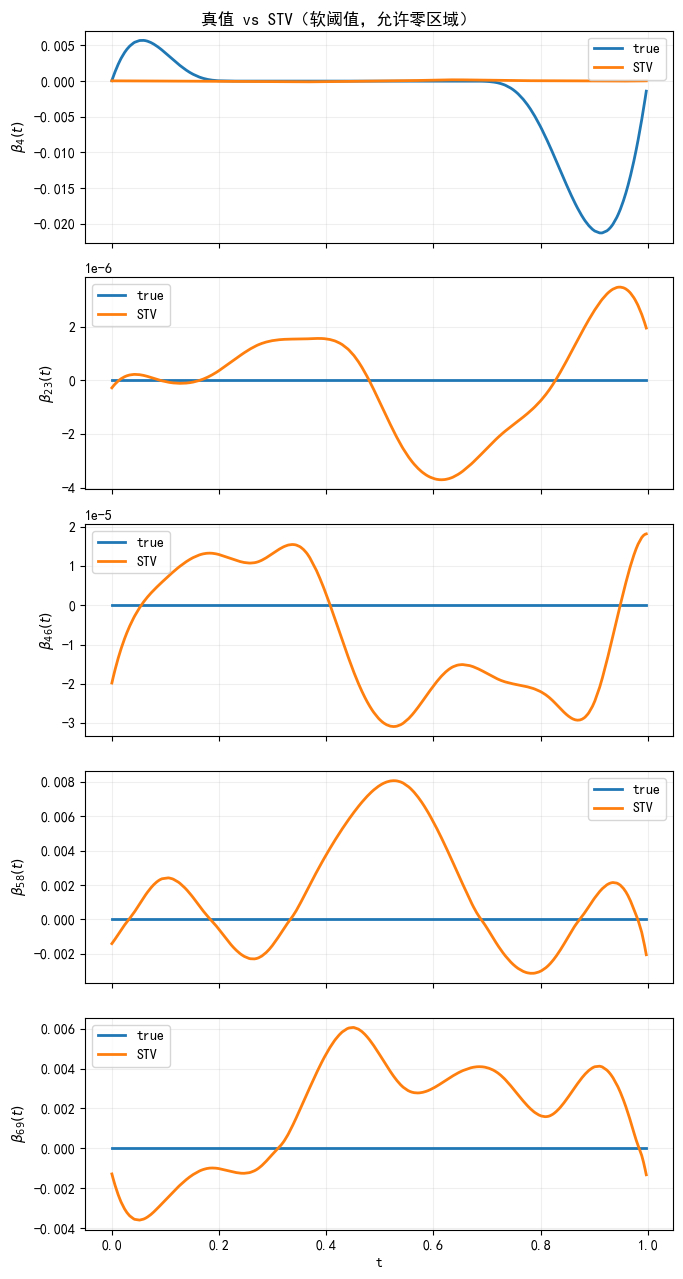

In [31]:
# ================================= STV：软阈值变系数（支持零区域）一键实验 ================================
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm
from scipy.interpolate import BSpline
np.set_printoptions(suppress=True, linewidth=140)

# ---------------- A) 准备：数据（沿用你当前 t, X, y；若要复现实验请取消下一行注释以随机生成） ----------------
# t, X, y, beta_true, _ = generate_vcm_data(n=400, P=100, signal_idx=[3,10,25,40,78], sigma=0.3, seed=0)

# 样条配置（沿用你当前的）
k = 3
n_inner = 10
knots = make_open_uniform_knots(float(t.min()), float(t.max()), k, n_inner)
B = bspline_design_matrix(t, knots, k)          # (n×m)
n, m = B.shape
P = X.shape[1]

# ---------------- B) 函数软阈值：光滑近似 H_eta 和其一阶导 ----------------
# 目标：beta_j(t) = zeta{theta_j(t), alpha_j}，数值上用 H_eta(theta, alpha) ≈ zeta（处处可导，便于GD）
def H_eta(theta, alpha, eta):
    # 论文给的一个平滑近似（用 arctan 实现），这里向量化实现
    # H_eta(theta, alpha) = 0.5 * ( [1 + (2/pi) arctan((theta-alpha)/eta)]*(theta-alpha)
    #                             + [1 - (2/pi) arctan((theta+alpha)/eta)]*(theta+alpha) )
    u = (theta - alpha) / eta
    v = (theta + alpha) / eta
    return 0.5 * ((1 + (2/np.pi)*np.arctan(u))*(theta - alpha) + (1 - (2/np.pi)*np.arctan(v))*(theta + alpha))

def dH_dtheta(theta, alpha, eta):
    # 对 H_eta 关于 theta 的导数（链式法则用在梯度里）
    u = (theta - alpha) / eta
    v = (theta + alpha) / eta
    du = 1/eta; dv = 1/eta
    term1 = 0.5 * ((2/np.pi) * (1/(1+u*u)) * du * (theta - alpha) + (1 + (2/np.pi)*np.arctan(u)))
    term2 = 0.5 * (-(2/np.pi) * (1/(1+v*v)) * dv * (theta + alpha) + (1 - (2/np.pi)*np.arctan(v)))
    return term1 + term2

# ---------------- C) 阈值 alpha 的设定（不“偷看”零区，依论文建议用参数回归规模的一半） ----------------
# 做一次简单线性回归（不含样条），把其绝对回归系数的一半作为各组 alpha_j 的数量级
# 也可固定 alpha_j = 常数 * y 的尺度（例如 0.3*std(y)），或通过CV选 alpha_j；这里给出两种可选方案：
def alphas_from_ols(y, X):
    # 正规方程的最小二乘（列数大时可用岭回归），这里只做基线数量级
    XtX = X.T @ X + 1e-8*np.eye(X.shape[1])
    Xty = X.T @ y
    beta_ls = np.linalg.solve(XtX, Xty)
    return 0.5 * np.abs(beta_ls)

def alphas_from_scale(y, scale=0.3):
    return np.full(X.shape[1], scale * np.std(y))

# 选一种：优先用 OLS 规模法；若担心多重共线，可换成 scale 法
alpha_vec = alphas_from_ols(y, X)   # 或：alphas_from_scale(y, scale=0.3)

# ---------------- D) 目标函数：平滑近似损失 + 内函数的脊惩罚（防止过拟合并唯一化表征） ----------------
# L(c_1,...,c_P) = 0.5 * || y - sum_j X_j ∘ H_eta(B c_j, alpha_j) ||^2  +  rho * sum_j || B c_j ||^2
# 备注：rho 建议取 1/n^2 数量级（论文经验），eta 取 1e-3 左右
rho = 1.0 / (n**2)
eta = 1e-3

def stv_loss_and_grad(C_flat):
    # C_flat: (P*m,) 按组拼接；返回损失和梯度
    C = C_flat.reshape(P, m)
    theta = B @ C.T                      # (n×P)，每列是 theta_j(t)
    H = H_eta(theta, alpha_vec, eta)     # (n×P)，逐元素用各组 alpha_j（广播）
    y_pred = (X * H).sum(axis=1)         # \sum_j X_j * H_j
    res = y_pred - y

    # 损失
    data_loss = 0.5 * np.mean(res**2)
    ridge = rho * np.sum((B @ C.T)**2)
    loss = data_loss + ridge

    # 梯度：对每组 c_j
    dH = dH_dtheta(theta, alpha_vec, eta)              # (n×P)
    # dL/d theta_j = (1/n) * res * X_j * dH_j
    G_theta = (res[:, None] * X * dH) / len(y)         # (n×P)
    # dL/d c_j = B^T * G_theta_j  +  2*rho * B^T * (B c_j)
    grad = np.zeros_like(C)
    Bt = B.T
    BC = B @ C.T                                       # (n×P)
    for j in range(P):
        grad[j, :] = Bt @ G_theta[:, j] + 2*rho * (Bt @ BC[:, j])
    return loss, grad.reshape(-1)

# ---------------- E) 用简单的（带回溯）梯度下降求解 ----------------
def stv_fit(max_iter=2000, lr=1.0, tol=1e-6, verbose=True):
    C = np.zeros((P, m))
    C_flat = C.reshape(-1)
    loss_prev = np.inf
    for it in range(max_iter):
        loss, g = stv_loss_and_grad(C_flat)
        # 回溯线搜索
        step = lr
        while True:
            C_try = C_flat - step * g
            loss_try, _ = stv_loss_and_grad(C_try)
            if loss_try <= loss - 1e-4*step*(g@g) or step < 1e-8:
                C_flat = C_try
                loss = loss_try
                break
            step *= 0.5
        if verbose and (it % 50 == 0 or it < 10):
            print(f"[STV] it={it:4d}  loss={loss:.6f}  step={step:.2e}")
        if abs(loss_prev - loss) <= tol * max(1.0, loss_prev):
            if verbose: print(f"[STV] converged at it={it}, loss={loss:.6f}")
            break
        loss_prev = loss
    # 输出
    C = C_flat.reshape(P, m)
    theta = B @ C.T
    H = H_eta(theta, alpha_vec, eta)
    yhat = (X * H).sum(axis=1)
    return C, theta, H, yhat, loss

C_hat, theta_hat, H_hat, yhat_stv, loss_stv = stv_fit(max_iter=1500, lr=1.0, tol=1e-6, verbose=True)

rmse = float(np.sqrt(np.mean((y - yhat_stv)**2)))
print(f"[STV] Train RMSE = {rmse:.4f}")

# ---------------- F) 变量选择与“零区域”检测 ----------------
# 1) 变量层面（整组“完全零”）：若 H_j(t) 几乎全为0 就判为“全零变量”
eps_group = 1e-6
group_energy = H_hat.std(axis=0)  # 或 np.max(np.abs(H_hat), axis=0)
selected = np.where(group_energy > eps_group)[0].tolist()
print(f"[STV] Selected groups: {len(selected)} / {P}")
print("Selected ids (first 30):", selected[:30])

# 2) 局部零区域：对每个已选组，找出 H_j(t) 的 |.| < ϵ 的连续区间（简单阈值法）
def zero_regions_on_grid(t, hj, thr=1e-3, min_len=5):
    idx = np.where(np.abs(hj) < thr)[0]
    if len(idx) == 0: return []
    # 连续段
    segs = []
    start = idx[0]
    for i in range(1, len(idx)):
        if idx[i] != idx[i-1] + 1:
            if i-1 - (start_idx:=np.where(idx==start)[0][0]) + 1 >= min_len:
                segs.append((t[start], t[idx[i-1]]))
            start = idx[i]
    # 最后一段
    if len(idx) - np.where(idx==start)[0][0] >= min_len:
        segs.append((t[start], t[idx[-1]]))
    return segs

# 报告前若干个已选组的零区域
for j in selected[:5]:
    zr = zero_regions_on_grid(t, H_hat[:, j], thr=1e-3, min_len=8)
    if len(zr):
        print(f"[STV] group {j}: zero-regions ≈ {zr}")
    else:
        print(f"[STV] group {j}: no clear zero-region")

# ---------------- G) 可视化：对真有效组画 “真值 vs STV估计（含零区域）” ----------------
if 'beta_true' in globals():
    order = np.argsort(t)
    r = min(5, len(selected))
    fig, axes = plt.subplots(r, 1, figsize=(7, 2.0*r+3), sharex=True)
    if r==1: axes=[axes]
    shown = 0
    for j in selected:
        if shown >= r: break
        ax = axes[shown]
        ax.plot(t[order], beta_true[order, j], lw=2, label="true")
        ax.plot(t[order], H_hat[order, j], lw=2, label="STV")
        ax.set_ylabel(fr"$\beta_{{{j+1}}}(t)$"); ax.grid(alpha=0.2); ax.legend(loc="best")
        shown += 1
    axes[-1].set_xlabel("t")
    fig.suptitle("真值 vs STV（软阈值，允许零区域）")
    plt.tight_layout(); plt.show()
